In [1]:
# data from: https://arcticdata.io/catalog/view/doi%3A10.18739%2FA2FT8DK8Z
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import math
import numpy as np
import glob
import os
import csv

wl_4b = np.asarray([490, 565, 665, 865])
wl_8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
def plot_spectra(df, title):
    plt.figure(figsize=(12,6))
    # get the wavelengths from the first column
    wl = df.iloc[:, 0]
    # Loop through the rest of the columns (y-values) and plot them
    for col_name in df.columns[1:]:
        y_values = df[col_name]
        plt.plot(wl, y_values, label=col_name)
    for wl_val in wl_4b:
        plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.25)
    for wl_val in wl_8b:
        plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.25)
    # Add labels and legend to the plot
    plt.xlabel("Reflectance")
    plt.ylabel("Wavelength (nm)")
    plt.grid(True)
    plt.title(title)
    #plt.legend()
    # Show the plot
    plt.show()

def find_row_with_wavelengths(csv_file_path):
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for index, row in enumerate(reader):
            if 'Wavelengths' in row:
                return index

class spectral_library:
    def __init__(self, wl):
        self.spectra = np.zeros((0))
        self.spectra8b = np.zeros((0))
        self.spectra4b = np.zeros((0))
        self.wl = wl
        self.wl8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])
        self.wl4b = np.asarray([490, 565, 665, 865])
        self.nBands = len(wl)
        self.nSpec = 0
        self.names = []
    def add(self, spec, name=''): 
        if len(self.spectra) == 0:
            self.spectra = spec
        else:
            self.spectra = np.row_stack((self.spectra, spec))
        self.names.append(name)
        self.nSpec = self.nSpec + 1
    def resample_planet8b(self):
        self.spectra8b = np.zeros((self.nSpec,8))
        band_ranges = [[431,451],[465,515],[513,549],[547,583],[600,620],[650,682],[697,713],[845,885]]
        for spec_idx in range(self.nSpec):
            for band_idx in range(8):
                low = band_ranges[band_idx][0]
                high = band_ranges[band_idx][1]
                val = 0
                count = 0
                idx_list = np.where((self.wl>low)*(self.wl<high))
                #print(idx_list)
                for i in idx_list[0]:
                    #print(spec_idx)
                    #print(i)
                    #print(np.isfinite(self.spectra[spec_idx,i]))
                    if np.isfinite(self.spectra[spec_idx,i]):
                        val = val + self.spectra[spec_idx,i]
                        count = count + 1
                if count>0:
                    self.spectra8b[spec_idx,band_idx] = val/count
                else:
                    self.spectra8b[spec_idx,band_idx] = np.NaN


In [3]:
current_directory = os.path.dirname(os.getcwd())
csv_files = glob.glob(os.path.join(current_directory, "data\SpectralAlbedoData\*.csv"))

# get the wavelengths:
idx = find_row_with_wavelengths(csv_files[0])
df = pd.read_csv(csv_files[0], header=idx)
wl = df.iloc[:, 0]
sli = spectral_library(wl)

# Iterate through each CSV file and perform the desired operations
for csv_file in csv_files:
    if csv_file[-3:]=='csv':
        # read the spectra into a dataframe
        idx = find_row_with_wavelengths(csv_file)
        df = pd.read_csv(csv_file, header=idx)
        # add to the spectral library
        for col_name in df.columns[1:]:
            sli.add(df[col_name], name=col_name)
        #plot_spectra(df, csv_file[csv_file.rfind('\\'):])

In [ ]:
print(sli.wl[1])
print(sli.spectra[1])


KeyboardInterrupt



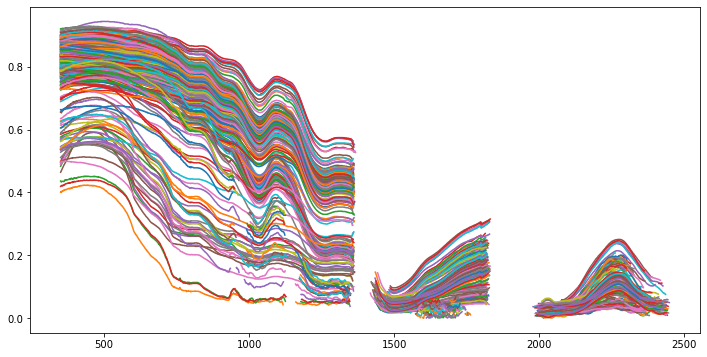

In [8]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra[idx,:]
    plt.plot(wl, y_values, label=sli.names[idx])
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra')
#plt.legend()
# Show the plot
plt.show()

In [ ]:
print(sli.names[1])

In [4]:
sli.resample_planet8b()

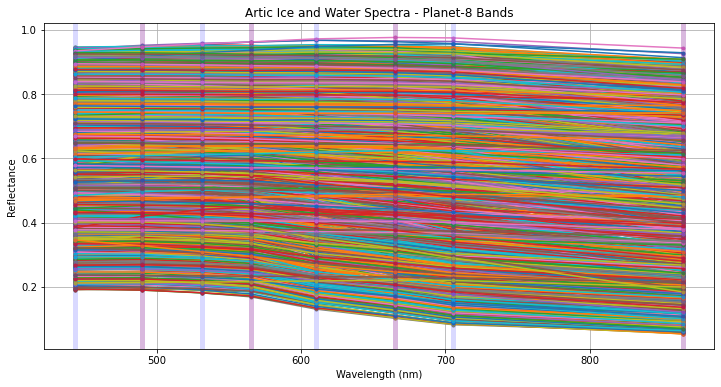

In [10]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values, label=sli.names[idx], marker='.')
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands')
#plt.legend()
# Show the plot
plt.show()

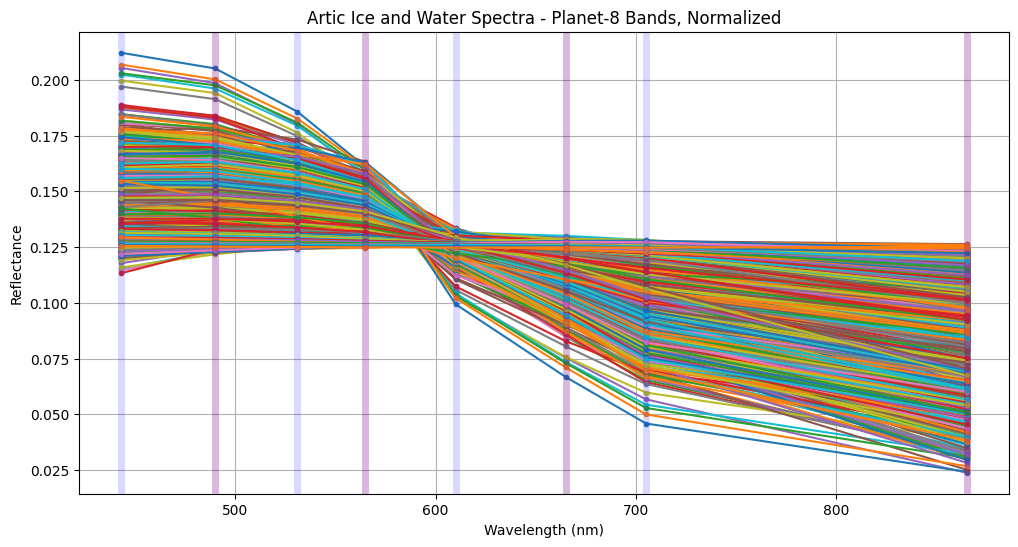

In [204]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values/np.sum(y_values), label=sli.names[idx], marker='.')
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
#plt.legend()
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands, Normalized')
#plt.legend()
# Show the plot
plt.show()

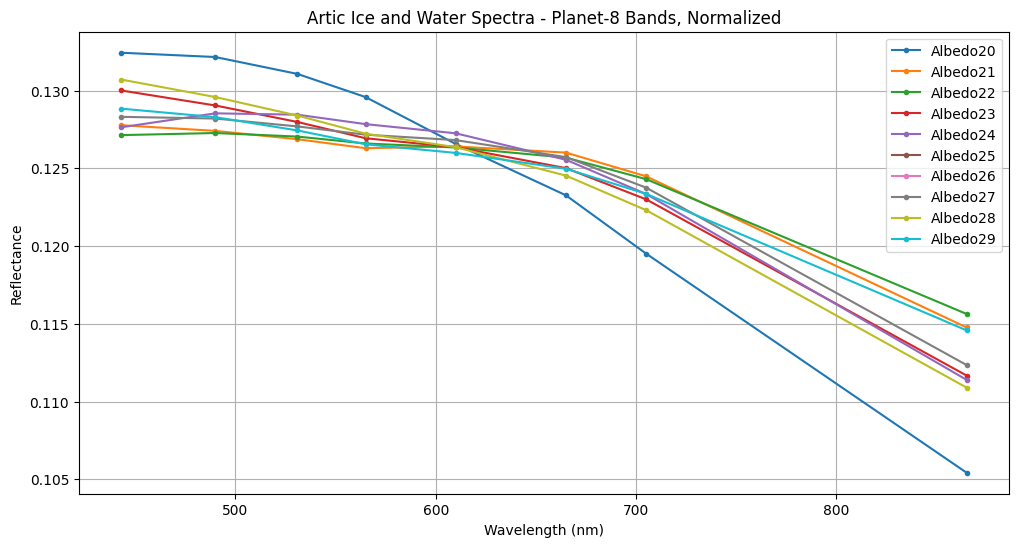

In [205]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(200,210):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values/np.sum(y_values), label=sli.names[idx], marker='.')
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.legend()
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands, Normalized')
#plt.legend()
# Show the plot
plt.show()

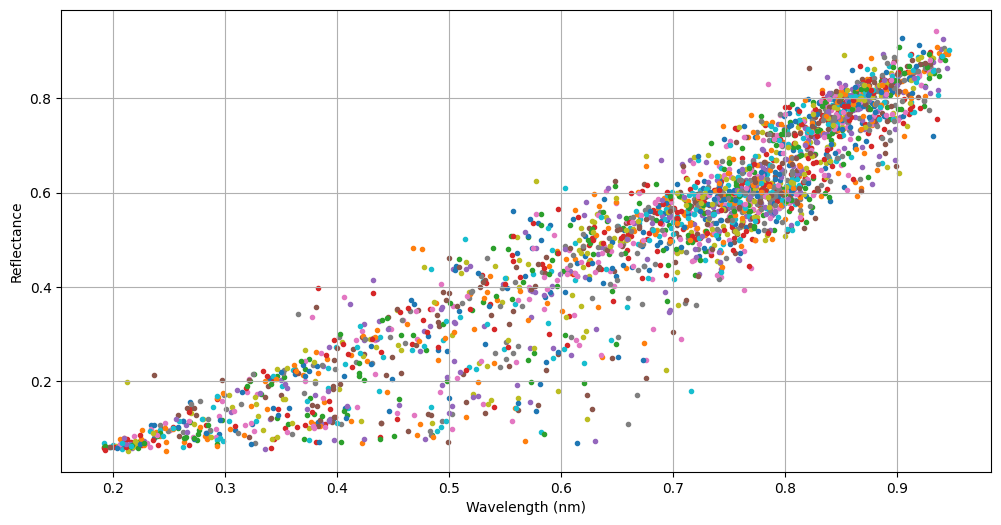

In [206]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.scatter(y_values[0],y_values[7], label=sli.names[idx], marker='.')
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
#plt.legend()
# Show the plot
plt.show()

In [5]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming sli.spectra8b is your 2D array

# Create a boolean mask to identify rows without NaN values
mask = ~np.isnan(sli.spectra8b).any(axis=1)
#mask = ~np.isnan(sli).any(axis=1)

# Use the mask to filter out rows with NaN values
data = sli.spectra8b[mask, :]
#data = sli[mask, :]


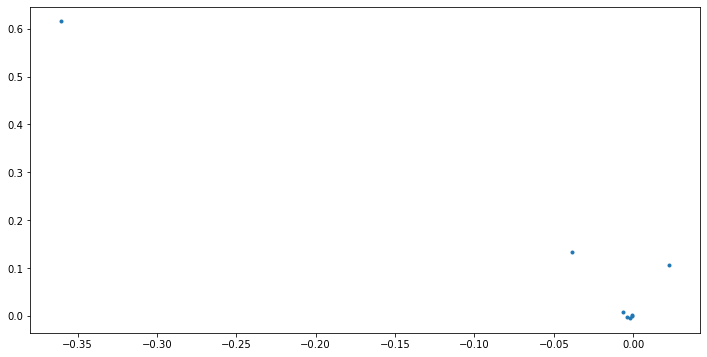

In [6]:
data = sli.spectra8b[~np.isnan(sli.spectra8b).any(axis=1),:]
#data = sli
pca = PCA()
pca.fit(data)
pca_spec = pca.transform(data)
plt.scatter(pca_spec[0,:],pca_spec[1,:], marker='.')

In [7]:
sli.nSpec, sli.nBands

(2712, 2151)

2388969
(2712, 2151)
0


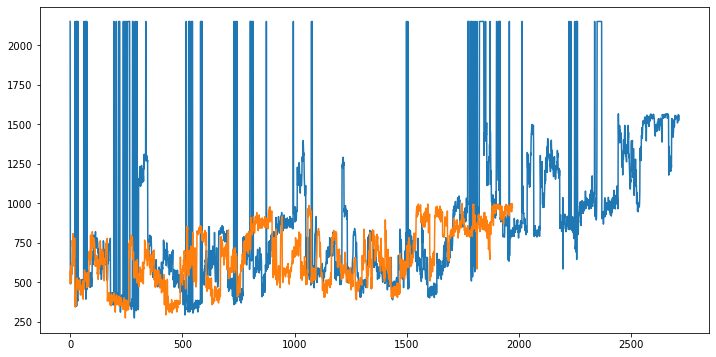

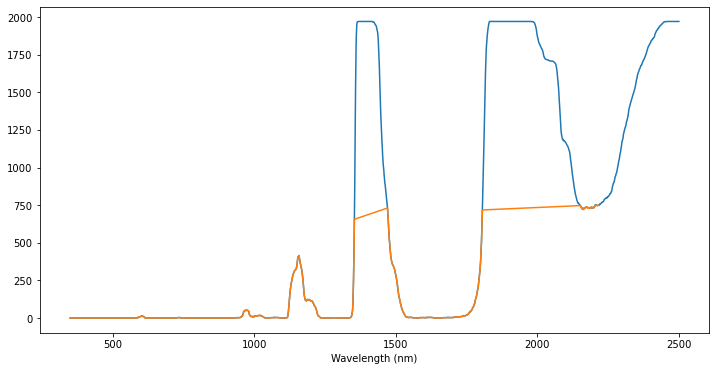

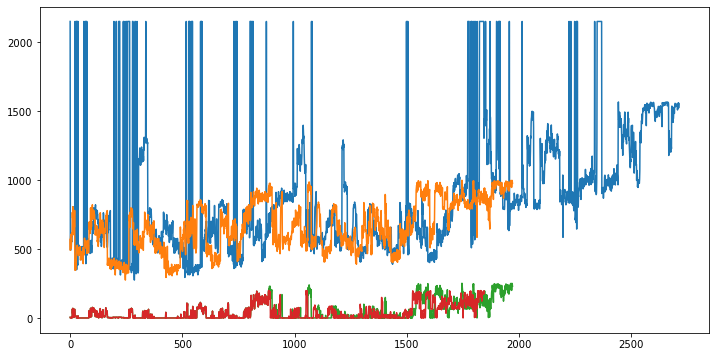

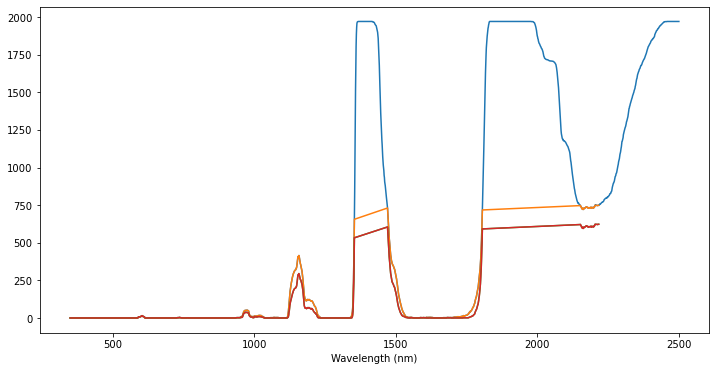

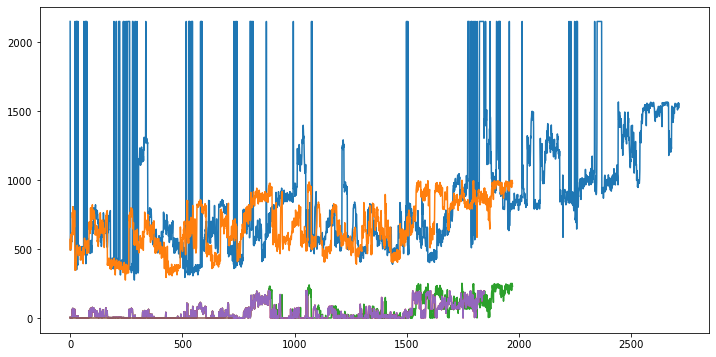

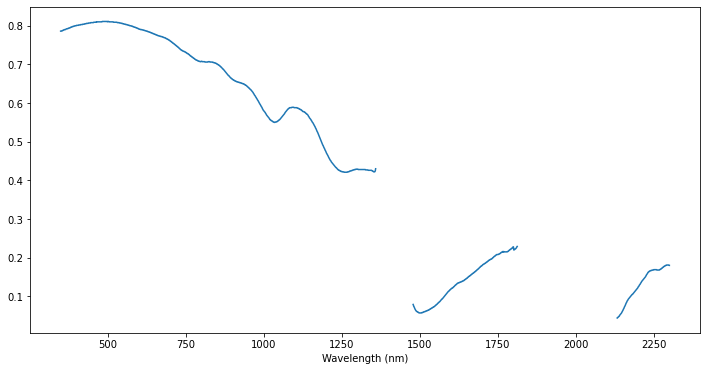

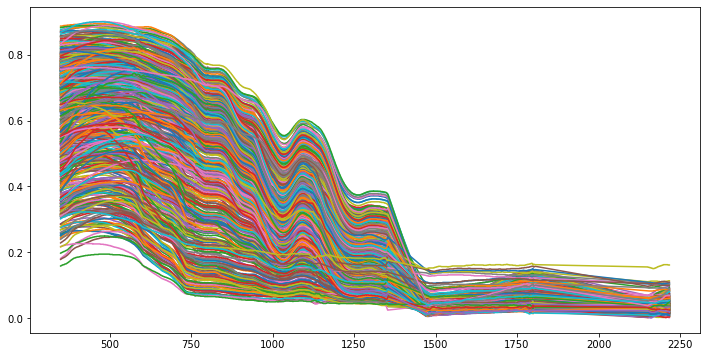

In [8]:
nan_mask = np.isnan(sli.spectra) 
nRows, nCols = nan_mask.shape
row_idx = np.arange(nRows)
col_idx = np.arange(nCols)
print(np.sum(nan_mask))
print(nan_mask.shape)

# reducing number of spectra
col_sum1 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum1<1000,:]
row_idx = row_idx[col_sum1<1000]
col_sum2 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)

# reducing number of bands
row_sum1 = np.sum(nan_mask, axis=0)
nan_mask = nan_mask[:,row_sum1<750]
col_idx = col_idx[row_sum1<750]
row_sum2 = np.sum(nan_mask, axis=0)
plt.figure()
plt.plot(wl,row_sum1)
wl2 = wl[row_sum1<750]
plt.plot(wl2,row_sum2)
plt.xlabel("Wavelength (nm)")

# reducing number of spectra
col_sum3 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum3<200,:]
row_idx = row_idx[col_sum3<200]
col_sum4 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)
plt.plot(col_sum3)
plt.plot(col_sum4)

# reducing number of bands
row_sum3 = np.sum(nan_mask, axis=0)
nan_mask = nan_mask[:,row_sum3<750]
col_idx = col_idx[row_sum3<750]
row_sum4 = np.sum(nan_mask, axis=0)
plt.figure()
plt.plot(wl,row_sum1)
plt.plot(wl2,row_sum2)
plt.plot(wl2,row_sum3)
wl3 = wl2[row_sum3<750]
plt.plot(wl3,row_sum4)
plt.xlabel("Wavelength (nm)")

# reducing number of spectra
col_sum5 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum5<1,:]
row_idx = row_idx[col_sum5<1]
col_sum6 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)
plt.plot(col_sum3)
plt.plot(col_sum4)
plt.plot(col_sum5)
plt.plot(col_sum6)

plt.figure()
plt.plot(wl,sli.spectra[100,:]);
plt.xlabel("Wavelength (nm)")

print(np.sum(nan_mask))
data = sli.spectra[row_idx,:]
data = data[:,col_idx]
plt.figure()
plt.plot(wl3,data.T);

In [15]:
print(wl3[150], wl3[650])

500 1000


In [16]:
wl3

0        350
1        351
2        352
3        353
4        354
        ... 
1862    2212
1863    2213
1864    2214
1865    2215
1867    2217
Name: Wavelengths, Length: 1404, dtype: int64

# Locating Spectra for the 8 Classes, and Create a Class assigment (called cls and also BWI)

[ 100  400  600  700  750 1284]
[ 450  750  950 1050 1100 1634]
idx_snow: 82
79
587
628
595
367
384
450


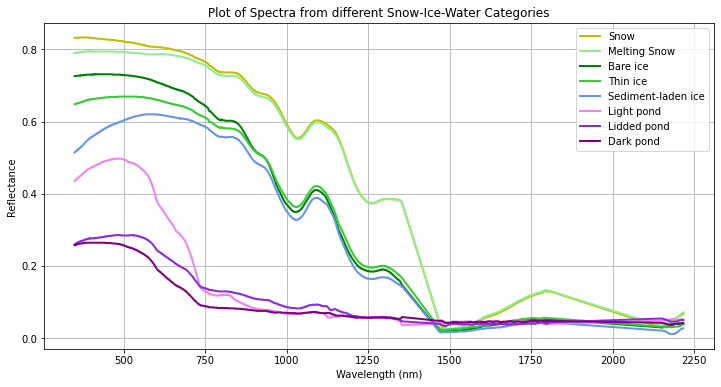

In [9]:
bands = []
bands.append(np.argmin(np.abs(wl3-450)))
bands.append(np.argmin(np.abs(wl3-750)))
bands.append(np.argmin(np.abs(wl3-950)))
bands.append(np.argmin(np.abs(wl3-1050)))
bands.append(np.argmin(np.abs(wl3-1100)))
bands.append(np.argmin(np.abs(wl3-1750)))
bands = np.asarray(bands).astype(int)
bands_wl = []
for x in bands:
    bands_wl.append(wl3[x])
bands_wl = np.asarray(bands_wl).astype(int)
print(bands)
print(bands_wl)


snow_vals = np.asarray([0.85,0.85,0.75,0.7,0.7,0.2])
# choose a snow spectrum:
idx_snow = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-snow_vals)**2)
    if dist < min_dist:
        idx_snow = i
        min_dist = dist
spec_snow = data[idx_snow,:]
print("idx_snow:",idx_snow)

melting_snow_vals = np.asarray([0.8,0.75,0.62,0.61,0.6,0.17])
# choose a snow spectrum:
idx_melting_snow = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-melting_snow_vals)**2)
    if dist < min_dist:
        idx_melting_snow = i
        min_dist = dist
spec_melting_snow = data[idx_melting_snow,:]
print(idx_melting_snow)

bare_ice_vals = np.asarray([0.75,0.65,0.42,0.37,0.41,0.04])
# choose a snow spectrum:
idx_bare_ice = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-bare_ice_vals)**2)
    if dist < min_dist:
        idx_bare_ice = i
        min_dist = dist
spec_bare_ice = data[idx_bare_ice,:]
print(idx_bare_ice)

#450  750  950 1050 1100 1634
thin_ice_vals = np.asarray([0.65,0.61,0.42,0.39,0.43,0.04])
# choose a snow spectrum:
idx_thin_ice = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-thin_ice_vals)**2)
    if dist < min_dist:
        idx_thin_ice = i
        min_dist = dist
spec_thin_ice = data[idx_thin_ice,:]
print(idx_thin_ice)

#450  750  950 1050 1100 1634
sediment_ice_vals = np.asarray([0.54,0.61,0.4,0.36,0.38,0.04])
# choose a snow spectrum:
idx_sediment_ice = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-sediment_ice_vals)**2)
    if dist < min_dist:
        idx_sediment_ice = i
        min_dist = dist
spec_sediment_ice = data[idx_sediment_ice,:]
print(idx_sediment_ice)

#450  750  950 1050 1100 1634
light_pond_vals = np.asarray([0.55,0.1,0.08,0.07,0.06,0.05])
# choose a snow spectrum:
idx_light_pond = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-light_pond_vals)**2)
    if dist < min_dist:
        idx_light_pond = i
        min_dist = dist
spec_light_pond = data[idx_light_pond,:]
print(idx_light_pond)

#450  750  950 1050 1100 1634
lidded_pond_vals = np.asarray([0.25,0.18,0.12,0.12,0.06,0.05])
# choose a snow spectrum:
idx_lidded_pond = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-lidded_pond_vals)**2)
    if dist < min_dist:
        idx_lidded_pond = i
        min_dist = dist
spec_lidded_pond = data[idx_lidded_pond,:]
print(idx_lidded_pond)

#450  750  950 1050 1100 1634
dark_pond_vals = np.asarray([0.25,0.1,0.08,0.07,0.06,0.05])
# choose a snow spectrum:
idx_dark_pond = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-dark_pond_vals)**2)
    if dist < min_dist:
        idx_dark_pond = i
        min_dist = dist
spec_dark_pond = data[idx_dark_pond,:]
print(idx_dark_pond)

plt.figure()
plt.plot(wl3, spec_snow, color='y', linewidth=2, label='Snow')
plt.plot(wl3, spec_melting_snow, color='lightgreen', linewidth=2, label='Melting Snow')
plt.plot(wl3, spec_bare_ice, color='g', linewidth=2, label='Bare ice')
plt.plot(wl3, spec_thin_ice, color='limegreen', linewidth=2, label='Thin ice')
plt.plot(wl3, spec_sediment_ice, color='cornflowerblue', linewidth=2, label='Sediment-laden ice')
plt.plot(wl3, spec_light_pond, color='violet', linewidth=2, label='Light pond')
plt.plot(wl3, spec_lidded_pond, color='blueviolet', linewidth=2, label='Lidded pond')
plt.plot(wl3, spec_dark_pond, color='purple', linewidth=2, label='Dark pond')
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Plot of Spectra from different Snow-Ice-Water Categories')
plt.legend(); 

colors = ['y','lightgreen','g','limegreen','cornflowerblue','violet','blueviolet','purple']

#Perform classification based on these spectra
cls = np.zeros(data.shape[0]).astype(int)
for i in range(data.shape[0]):
    distances = np.asarray([math.dist(data[i,:],spec_snow),
        math.dist(data[i,:],spec_melting_snow),
        math.dist(data[i,:],spec_bare_ice),
        math.dist(data[i,:],spec_thin_ice),
        math.dist(data[i,:],spec_sediment_ice),
        math.dist(data[i,:],spec_light_pond),
        math.dist(data[i,:],spec_lidded_pond),
        math.dist(data[i,:],spec_dark_pond)        
    ])
    cls[i] = np.argmin(distances)

# REDEFINING BWI:
BWI = cls

In [10]:
print("idx_snow:",idx_snow)
print(spec_snow[100])
print(spec_dark_pond[100])
print(cls[100])
print(BWI[100])

idx_snow: 82
0.827
0.263
2
2


In [11]:
print(data.shape) 
data_X = data.copy()

############ THIS IS 1404 WAVELENGTHS WITH 720 ALBEDOS #######################

pca = PCA(whiten=True, n_components=10)
pca.fit(data)
pca_spec = pca.transform(data)
print(pca_spec.shape)


(720, 1404)
(720, 10)


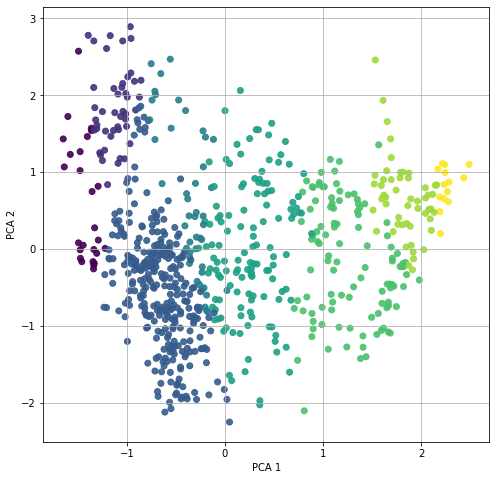

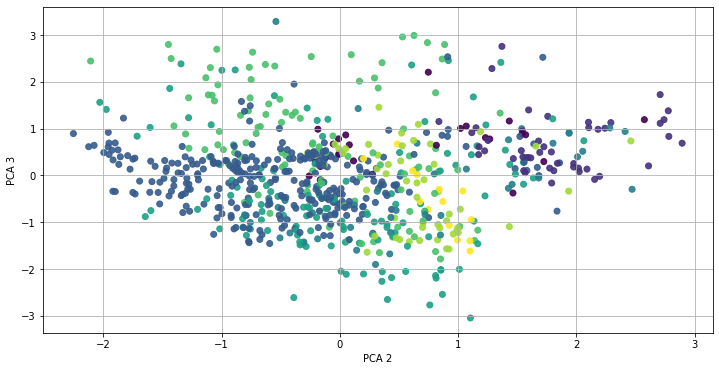

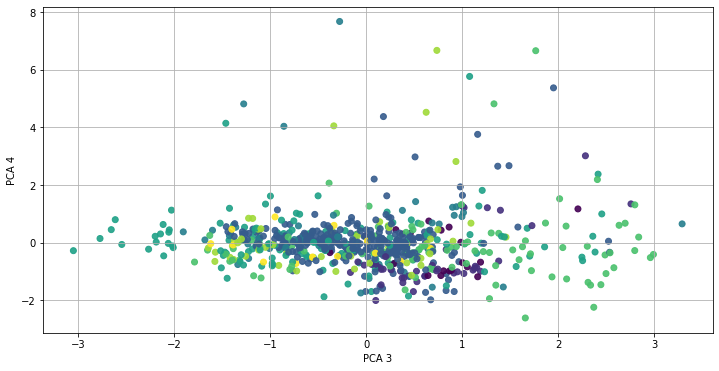

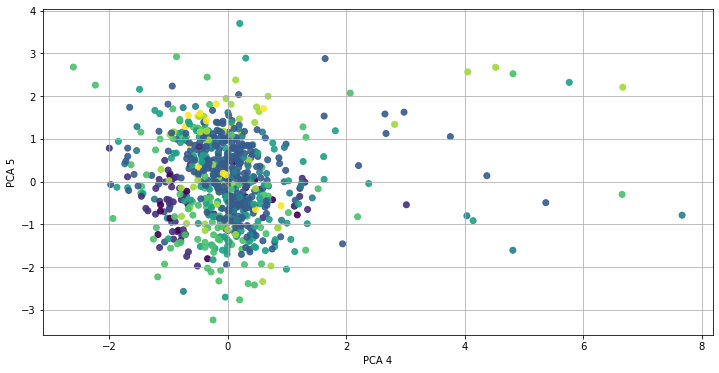

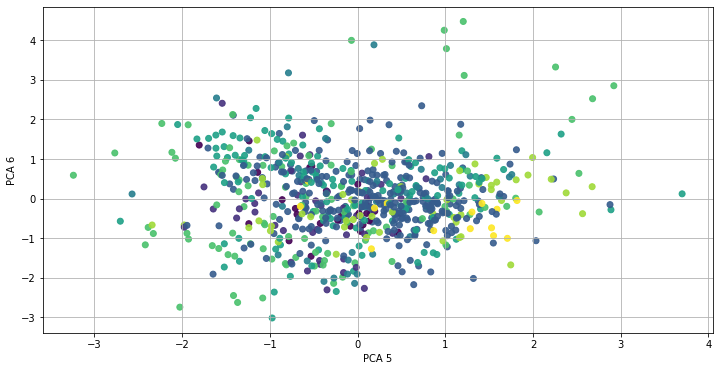

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(pca_spec[:,0],pca_spec[:,1], alpha=0.9, c=BWI)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[:,1],pca_spec[:,2], alpha=0.9, c=BWI)
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[:,2],pca_spec[:,3], alpha=0.9, c=BWI)
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[:,3],pca_spec[:,4], alpha=0.9, c=BWI)
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[:,4],pca_spec[:,5], alpha=0.9, c=BWI)
plt.xlabel('PCA 5')
plt.ylabel('PCA 6')
plt.grid(True)

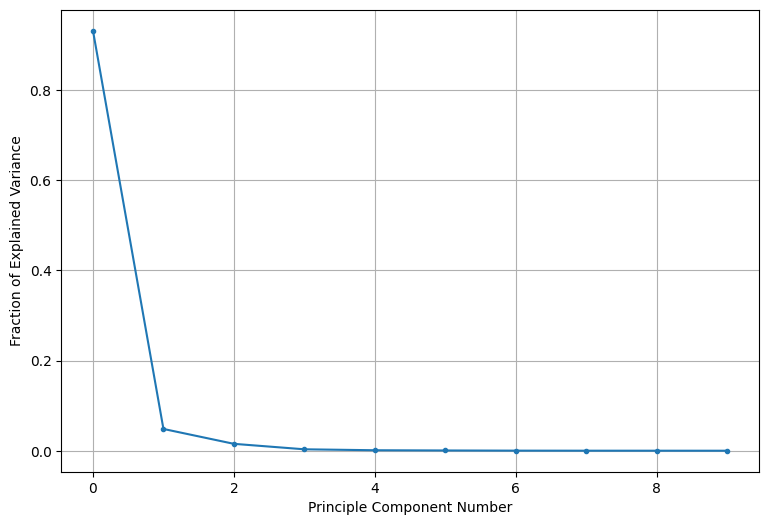

In [221]:
plt.figure(figsize=(9,6))
plt.plot(pca.explained_variance_ratio_, marker='.')
plt.xlabel('Principle Component Number')
plt.ylabel('Fraction of Explained Variance')
plt.grid(True)

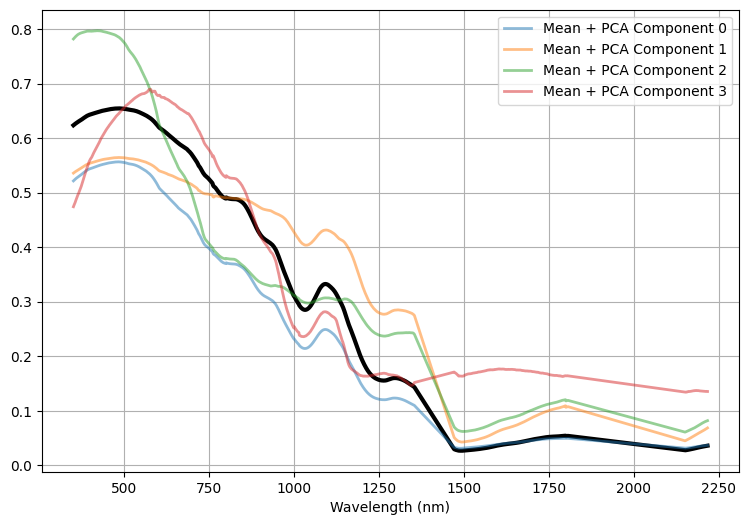

In [222]:
plt.figure(figsize=(9,6))
plt.plot(wl3, pca.mean_, 'k', linewidth=3)
for i in range(4):
    #note: I am multiplying by 2 to see the variation in the PCS better 
    plt.plot(wl3, pca.mean_ + 3*pca.components_[i,:], linewidth=2, label='Mean + PCA Component '+str(i), alpha=0.5)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.legend();

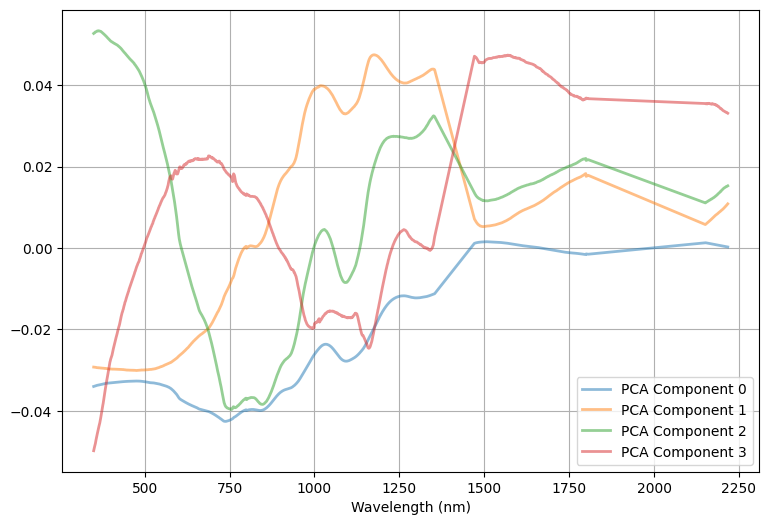

In [223]:
plt.figure(figsize=(9,6))
for i in range(4):
    #note: I am multiplying by 2 to see the variation in the PCS better 
    plt.plot(wl3, pca.components_[i,:], linewidth=2, label='PCA Component '+str(i), alpha=0.5)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.legend();

# Manifold Learning Stuff Starts Here

In [12]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from matplotlib.cm import ScalarMappable
from sklearn import (manifold, datasets, decomposition, ensemble, #lda,
                     random_projection)

### Needed to remove lda from sklearn due to error -- add back in later? ###


digits = datasets.load_digits(n_class=6)
Xd = digits.data
yd = digits.target

print(Xd.shape)
print(yd.shape)

#n_samples, n_features = X.shape
#n_neighbors = 30


sli.resample_planet8b()

X = sli.spectra8b
y = np.arange(X.shape[0])

print(X.shape)
print(y.shape)

In [13]:
X = data
y = np.arange(X.shape[0])

print(X.shape)
print(y.shape)

############ THIS IS 720 ALBEDOS AND 1404 WAVELENGTHS #######################


(720, 1404)
(720,)


In [14]:
thumbnails = [plt.imread("1_dry_snow.png"), plt.imread("2_melting_snow.png"), plt.imread("3_bare_ice.png"), plt.imread("dnu_4_thin_ice.PNG"),
              plt.imread("5_sediment_ice.png"), plt.imread("6_light_pond.png"), plt.imread("dnu_7_lidded_pond.png"), plt.imread("8_dark_pond.png")]  


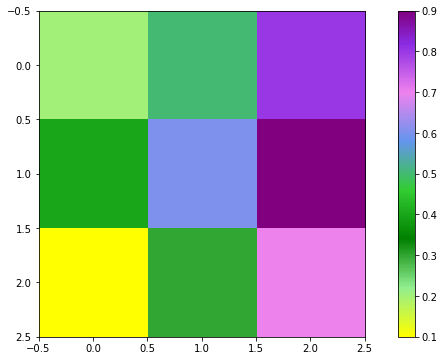

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for your custom colormap
colors = ['yellow', 'lightgreen', 'green', 'limegreen', 'cornflowerblue', 'violet', 'blueviolet', 'purple']

# Define the positions where colors will be interpolated (0-1 range)
positions = [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.0]

# Create the custom colormap
BWI_cmap = LinearSegmentedColormap.from_list("custom_colormap", list(zip(positions, colors)))

# Plot using the custom colormap
data_sample = [[0.2, 0.5, 0.8],
        [0.4, 0.6, 0.9],
        [0.1, 0.3, 0.7]]

plt.imshow(data, cmap=BWI_cmap)
plt.colorbar()
plt.show()


In [21]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors with DOTS and THUMBNAILS.
# Thumbnails are placed using wl = 532 (highest reflectance).

def plot_embedding_yesthumb1(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   ### normalize ###

    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)  ### for thumbnails ###
    sm = ScalarMappable(cmap=plt.cm.rainbow)
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[BWI[i]])
        #plt.text(X[i, 0], X[i, 1], str(y[i]),
                 #color=plt.cm.viridis((data[i,182] - data[i,714])/(data[i,182] + data[i,714])))
                 #wl3[182], wl3[714]
                 #fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        #thumbnail = thumbnails[i % len(thumbnails)]  ### THIS NEEDS TO BE UPDATED WITH CORRECT THUMBNAIL ###
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #if np.max(data[i,:]) >= 0.8:
                #thumbnail = thumbnails[0]
            if (data[i,182]) >= 0.85:
                thumbnail = thumbnails[0]
            #elif (data[i,182]) < 0.85 and np.max(data[i,:]) >= 0.78:
            elif (data[i,182]) < 0.85 and (data[i,182]) >= 0.78:
                thumbnail = thumbnails[1]
            elif (data[i,182]) < 0.78 and (data[i,182]) >= 0.7:
                thumbnail = thumbnails[2]
            elif (data[i,182]) < 0.7 and (data[i,182]) >= 0.6:
                thumbnail = thumbnails[3]
            elif (data[i,182]) < 0.6 and (data[i,182]) >= 0.3:
                thumbnail = thumbnails[4]
            elif (data[i,182]) < 0.3:
                thumbnail = thumbnails[5]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xlabel('')
    plt.ylabel('')
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap

def plot_embedding_yesthumb1a(X, title=None):
    
    # Define the colors for your custom colormap
    colors = ['yellow', 'lightgreen', 'green', 'limegreen', 'cornflowerblue', 'violet', 'blueviolet', 'purple']

    # Define the positions where colors will be interpolated (0-1 range)
    positions = [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.0]

    # Create the custom colormap
    custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", list(zip(positions, colors)))

    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   # Normalize

    plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)  # For thumbnails
    sm = ScalarMappable(cmap=custom_cmap)  # Use the custom colormap
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[BWI[i]])

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #if np.max(data[i,:]) >= 0.8:
                #thumbnail = thumbnails[0]
            if (data[i,182]) >= 0.85:
                thumbnail = thumbnails[0]
            #elif (data[i,182]) < 0.85 and np.max(data[i,:]) >= 0.78:
            elif (data[i,182]) < 0.85 and (data[i,182]) >= 0.78:
                thumbnail = thumbnails[1]
            elif (data[i,182]) < 0.78 and (data[i,182]) >= 0.7:
                thumbnail = thumbnails[2]
            elif (data[i,182]) < 0.7 and (data[i,182]) >= 0.6:
                thumbnail = thumbnails[3]
            elif (data[i,182]) < 0.6 and (data[i,182]) >= 0.3:
                thumbnail = thumbnails[4]
            elif (data[i,182]) < 0.3:
                thumbnail = thumbnails[5]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
        
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap

def plot_embedding_yesthumb_a(X, title=None):
    
    # Define the colors for your custom colormap
    colors = ['yellow', 'lightgreen', 'green', 'limegreen', 'cornflowerblue', 'violet', 'blueviolet', 'purple']

    # Define the positions where colors will be interpolated (0-1 range)
    positions = [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.0]

    # Create the custom colormap
    custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", list(zip(positions, colors)))

    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   # Normalize

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)  # For thumbnails
    sm = ScalarMappable(cmap=custom_cmap)  # Use the custom colormap
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[BWI[i]])

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            if (BWI[i]) == 0:
                thumbnail = thumbnails[0]
            elif (BWI[i]) == 1:
                thumbnail = thumbnails[1]
            elif (BWI[i]) == 2:
                thumbnail = thumbnails[2]
            elif (BWI[i]) == 3:
                thumbnail = thumbnails[3]
            elif (BWI[i]) == 4:
                thumbnail = thumbnails[4]
            elif (BWI[i]) == 5:
                thumbnail = thumbnails[5]
            elif (BWI[i]) == 6:
                thumbnail = thumbnails[6]
            elif (BWI[i]) == 7:
                thumbnail = thumbnails[7]
            imagebox = offsetbox.AnnotationBbox(
                #offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                offsetbox.OffsetImage(thumbnail, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
        
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)


In [25]:
colors[BWI[500]]

'cornflowerblue'

In [44]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors with DOTS and THUMBNAILS.
# Thumbnails are placed using wl = 1064 (lowest reflectance).

def plot_embedding_yesthumb2(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   ### normalize ###

    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)  ### for thumbnails ###
    sm = ScalarMappable(cmap=plt.cm.rainbow)
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[BWI[i]])
        #plt.text(X[i, 0], X[i, 1], str(y[i]),
                 #color=plt.cm.viridis((data[i,182] - data[i,714])/(data[i,182] + data[i,714])))
                 #wl3[182], wl3[714]
                 #fontdict={'weight': 'bold', 'size': 9})
        
    if hasattr(offsetbox, 'AnnotationBbox'):
        #thumbnail = thumbnails[i % len(thumbnails)]  ### THIS NEEDS TO BE UPDATED WITH CORRECT THUMBNAIL ###
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #if np.max(data[i,:]) >= 0.8:
                #thumbnail = thumbnails[0]
            if (data[i,714]) >= 0.65:
                thumbnail = thumbnails[0]
            #elif (data[i,182]) < 0.85 and np.max(data[i,:]) >= 0.78:
            elif (data[i,714]) < 0.65 and (data[i,714]) >= 0.5:
                thumbnail = thumbnails[1]
            elif (data[i,714]) < 0.5 and (data[i,714]) >= 0.35:
                thumbnail = thumbnails[2]
            elif (data[i,714]) < 0.35 and (data[i,714]) >= 0.2:
                thumbnail = thumbnails[3]
            elif (data[i,714]) < 0.2 and (data[i,714]) >= 0.1:
                thumbnail = thumbnails[4]
            elif (data[i,714]) < 0.1:
                thumbnail = thumbnails[5]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xlabel('Water / Ice Ratio')
    plt.ylabel('Y LABEL')
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)


In [18]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors with DOTS and THUMBNAILS.
# Thumbnails are placed using wl = 1064 (lowest reflectance).

def plot_embedding_yesthumb2a(X, title=None):
    # Define the colors for your custom colormap
    colors = ['yellow', 'lightgreen', 'green', 'limegreen', 'cornflowerblue', 'violet', 'blueviolet', 'purple']

    # Define the positions where colors will be interpolated (0-1 range)
    positions = [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.0]

    # Create the custom colormap
    custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", list(zip(positions, colors)))

    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   # Normalize

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)  # For thumbnails
    sm = ScalarMappable(cmap=custom_cmap)  # Use the custom colormap
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[BWI[i]])
        
    if hasattr(offsetbox, 'AnnotationBbox'):
        #thumbnail = thumbnails[i % len(thumbnails)]  ### THIS NEEDS TO BE UPDATED WITH CORRECT THUMBNAIL ###
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #if np.max(data[i,:]) >= 0.8:
                #thumbnail = thumbnails[0]
            if (data[i,714]) >= 0.65:
                thumbnail = thumbnails[0]
            #elif (data[i,182]) < 0.85 and np.max(data[i,:]) >= 0.78:
            elif (data[i,714]) < 0.65 and (data[i,714]) >= 0.5:
                thumbnail = thumbnails[1]
            elif (data[i,714]) < 0.5 and (data[i,714]) >= 0.35:
                thumbnail = thumbnails[2]
            elif (data[i,714]) < 0.35 and (data[i,714]) >= 0.2:
                thumbnail = thumbnails[3]
            elif (data[i,714]) < 0.2 and (data[i,714]) >= 0.1:
                thumbnail = thumbnails[4]
            elif (data[i,714]) < 0.1:
                thumbnail = thumbnails[5]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xlabel('Water / Ice Ratio')
    plt.ylabel('Y LABEL')
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)


In [45]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors with TEXT and THUMBNAILS.
# Thumbnails are placed using wl = 1064 (lowest reflectance).

def plot_embedding_yesthumb3(X, title=None):
                    
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   ### normalize ###

    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)  ### for thumbnails ###
    sm = ScalarMappable(cmap=plt.cm.cool)
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=colors[BWI[i]],
                 #wl3[182], wl3[714]
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        #thumbnail = thumbnails[i % len(thumbnails)]  ### THIS NEEDS TO BE UPDATED WITH CORRECT THUMBNAIL ###
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #if np.max(data[i,:]) >= 0.8:
                #thumbnail = thumbnails[0]
            if (data[i,714]) >= 0.65:
                thumbnail = thumbnails[0]
            #elif (data[i,182]) < 0.85 and np.max(data[i,:]) >= 0.78:
            elif (data[i,714]) < 0.65 and (data[i,714]) >= 0.5:
                thumbnail = thumbnails[1]
            elif (data[i,714]) < 0.5 and (data[i,714]) >= 0.35:
                thumbnail = thumbnails[2]
            elif (data[i,714]) < 0.35 and (data[i,714]) >= 0.2:
                thumbnail = thumbnails[3]
            elif (data[i,714]) < 0.2 and (data[i,714]) >= 0.1:
                thumbnail = thumbnails[4]
            elif (data[i,714]) < 0.1:
                thumbnail = thumbnails[5]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xlabel('Water / Ice Ratio')
    plt.ylabel('Y LABEL')
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)

# baseline water index = BWI

In [46]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors with TEXT and THUMBNAILS.
# Thumbnails are placed using wl = 1064 (lowest reflectance).

from sklearn import preprocessing

def plot_embedding_yesthumb4(X, title=None):

    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
                    
    #x_min, x_max = np.min(X, 0), np.max(X, 0)
    #X = (X - x_min) / (x_max - x_min)   ### normalize ###

    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)  ### for thumbnails ###
    sm = ScalarMappable(cmap=plt.cm.cool)
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        #plt.scatter(X[i, 0], X[i, 1],
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=colors[BWI[i]],
                 #wl3[182], wl3[714]
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        #thumbnail = thumbnails[i % len(thumbnails)]  ### THIS NEEDS TO BE UPDATED WITH CORRECT THUMBNAIL ###
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #if np.max(data[i,:]) >= 0.8:
                #thumbnail = thumbnails[0]
            if (data[i,714]) >= 0.65:
                thumbnail = thumbnails[0]
            #elif (data[i,182]) < 0.85 and np.max(data[i,:]) >= 0.78:
            elif (data[i,714]) < 0.65 and (data[i,714]) >= 0.5:
                thumbnail = thumbnails[1]
            elif (data[i,714]) < 0.5 and (data[i,714]) >= 0.35:
                thumbnail = thumbnails[2]
            elif (data[i,714]) < 0.35 and (data[i,714]) >= 0.2:
                thumbnail = thumbnails[3]
            elif (data[i,714]) < 0.2 and (data[i,714]) >= 0.1:
                thumbnail = thumbnails[4]
            elif (data[i,714]) < 0.1:
                thumbnail = thumbnails[5]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xlabel('Water / Ice Ratio')
    plt.ylabel('Y LABEL')
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)

# baseline water index = BWI

In [64]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors NO THUMBNAILS
def plot_embedding_nothumb(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   ### normalize ###

    plt.figure(figsize=(10,8))
    #ax = plt.subplot(111)  ### for thumbnails later ###
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[BWI[i]])
                 #color=plt.cm.Set1((data[i,150] - data[i,650])/(data[i,150] + data[i,650])))
                  
    #plt.xticks([]), plt.yticks([])
    plt.xlabel('X LABEL')
    plt.ylabel('Y LABEL')
    #plt.imshow(, cmap='viridis')
    plt.colorbar()
    #plt.show()
    if title is not None:
        plt.title(title)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap

def plot_embedding_nothumb_a(X, title=None):
    
    # Define the colors for your custom colormap
    colors = ['yellow', 'lightgreen', 'green', 'limegreen', 'cornflowerblue', 'violet', 'blueviolet', 'purple']

    # Define the positions where colors will be interpolated (0-1 range)
    positions = [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.0]

    # Create the custom colormap
    custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", list(zip(positions, colors)))

    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   # Normalize

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)  # For thumbnails
    sm = ScalarMappable(cmap=custom_cmap)  # Use the custom colormap
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[BWI[i]])

    plt.colorbar(sm)
    if title is not None:
        plt.title(title)

# Example usage:
# Replace `BWI` with your data, and call the function with your data and an optional title.
# plot_embedding_nothumb2(X, title="Custom Colormap Example")


### Below are plots of 720 albedos. BWI colors based on distance from 8 representative spectra.

Computing random projection


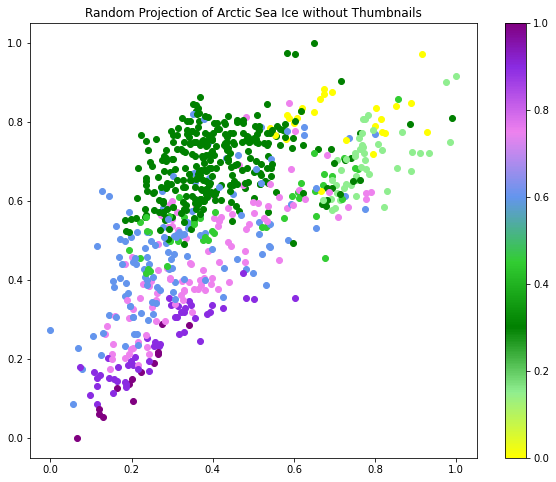

In [16]:
#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding_nothumb_a(X_projected, "Random Projection of Arctic Sea Ice without Thumbnails")


Computing random projection


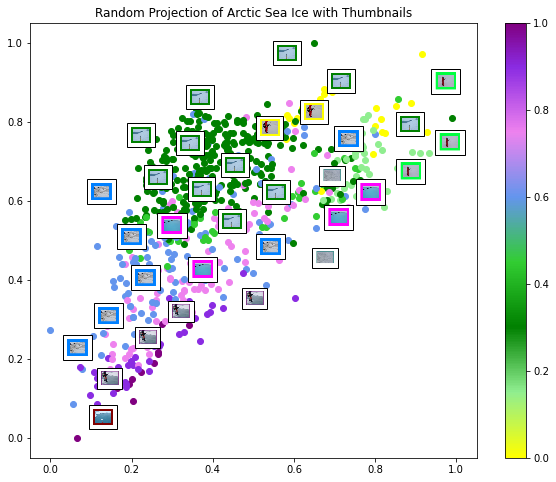

In [17]:
#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding_yesthumb_a(X_projected, "Random Projection of Arctic Sea Ice with Thumbnails")


Computing PCA projection


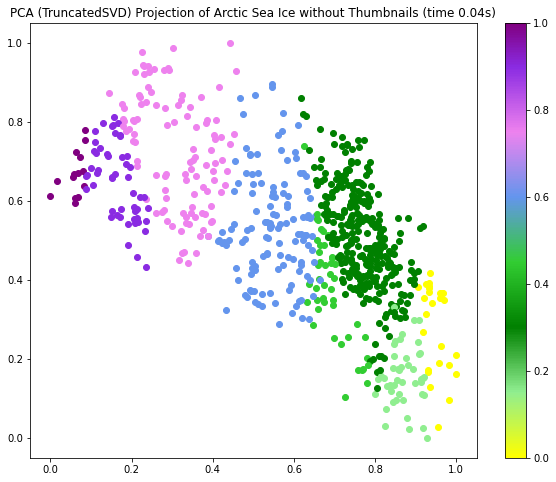

In [34]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding_nothumb_a(X_pca,
               "PCA (TruncatedSVD) Projection of Arctic Sea Ice without Thumbnails (time %.2fs)" %
               (time() - t0))


Computing PCA projection


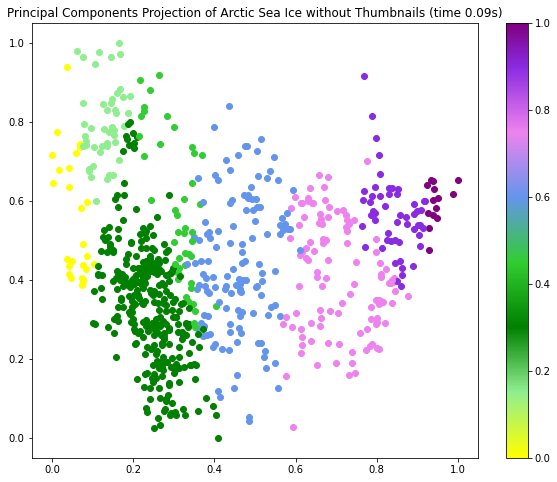

In [33]:
print("Computing PCA projection")
t0 = time()
#X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
pca = PCA(whiten=True, n_components=10)
pca.fit(X)
pca_spec = pca.transform(X)

plot_embedding_nothumb_a(pca_spec,
               "Principal Components Projection of Arctic Sea Ice without Thumbnails (time %.2fs)" %
               (time() - t0))


In [28]:
print(X_pca)
print(pca_spec)

[[10.7536642   0.97037036]
 [11.3698105   0.94003498]
 [11.0087758   1.30241276]
 ...
 [17.21373921 -2.52220542]
 [ 7.86358306 -0.32512617]
 [ 7.04752007  0.05498633]]
[[ 0.96292473  0.8653399   2.48710199 ...  4.22345161  0.10800919
   0.05042871]
 [ 0.83383875  0.88516673  2.79639332 ...  4.27277755 -1.73674497
   1.73315374]
 [ 0.92412064  0.6267475   2.99080829 ...  4.81307917  0.23171737
   0.56770387]
 ...
 [-0.55724485  2.46997552 -0.29690669 ...  0.28982719 -2.57450178
   1.08383282]
 [ 1.53389223  2.45941575  0.73623901 ... -1.9440318  -3.76010293
   1.853882  ]
 [ 1.69011094  1.43280063 -1.09537665 ...  2.15131775  0.09856844
   0.23434999]]


Computing PCA projection


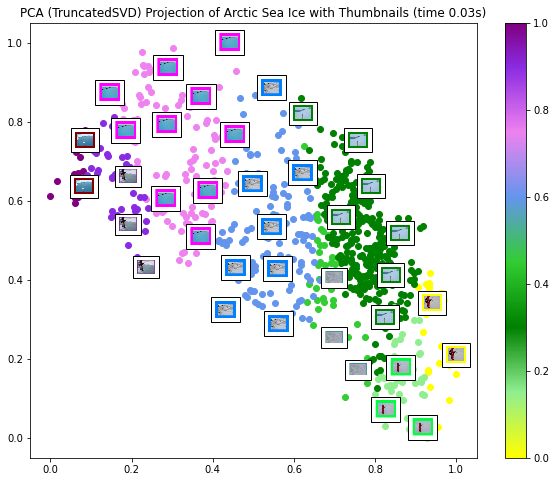

In [35]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding_yesthumb_a(X_pca,
               "PCA (TruncatedSVD) Projection of Arctic Sea Ice with Thumbnails (time %.2fs)" %
               (time() - t0))


Computing PCA projection


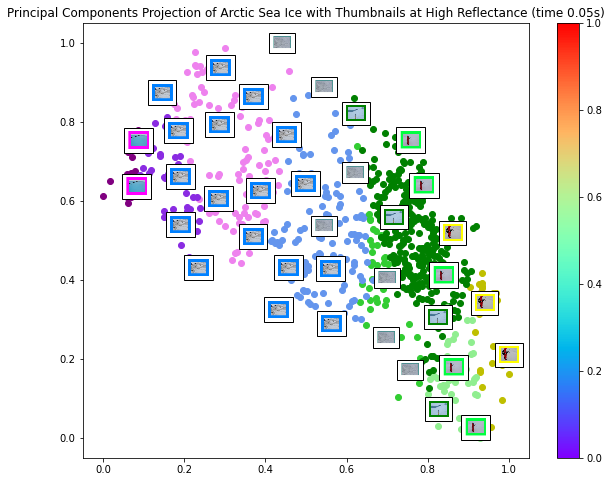

In [22]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding_yesthumb1(X_pca,
               "Principal Components Projection of Arctic Sea Ice with Thumbnails at High Reflectance (time %.2fs)" %
               (time() - t0))


Computing PCA projection


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\291322029.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


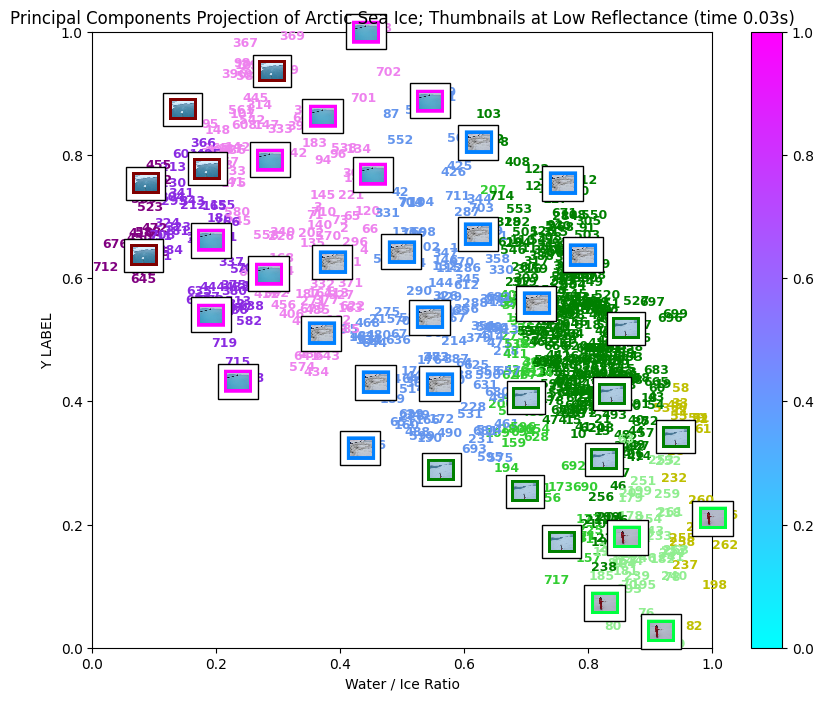

In [237]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding_yesthumb3(X_pca,
               "Principal Components Projection of Arctic Sea Ice; Thumbnails at Low Reflectance (time %.2fs)" %
               (time() - t0))


Computing LDA projection


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\2402323574.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


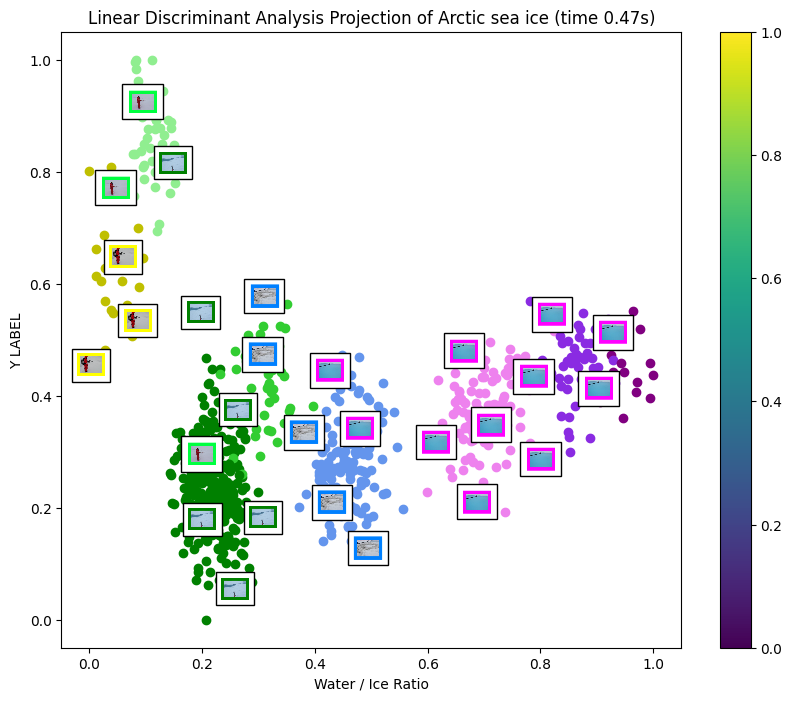

In [238]:
"""
"""
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming you have your X and y data ready, where X is your feature matrix and y is the target variable

print("Computing LDA projection")
t0 = time()
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X,cls)
#X_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X,y)
plot_embedding_yesthumb1(X_lda,
               "Linear Discriminant Analysis Projection of Arctic sea ice (time %.2fs)" %
               (time() - t0))


In [245]:
### FOR LABELS ON DOTS LATER ###
"""
from pyvis.network import Network
import networkx as nx
from scipy.cluster.hierarchy import linkage, fcluster

# Perform hierarchical clustering
linkage_matrix = linkage(df2, method='single')
clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

net.barnes_hut()

# Add nodes and edges
for i in range(len(X_pca)):
    network.add_node(i, title=i)

net.toggle_physics(True)
net.save_graph('net_graph_df2_0803b.html')

# When this finishes running, go to your folder and open the html file.  
# It will take a minute (more or less) to build depending on your laptop speed.
"""

'\nfrom pyvis.network import Network\nimport networkx as nx\nfrom scipy.cluster.hierarchy import linkage, fcluster\n\n# Perform hierarchical clustering\nlinkage_matrix = linkage(df2, method=\'single\')\nclusters = fcluster(linkage_matrix, t=5, criterion=\'maxclust\')\n\nnet = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")\n\nnet.barnes_hut()\n\n# Add nodes and edges\nfor i in range(len(X_pca)):\n    network.add_node(i, title=i)\n\nnet.toggle_physics(True)\nnet.save_graph(\'net_graph_df2_0803b.html\')\n\n# When this finishes running, go to your folder and open the html file.  \n# It will take a minute (more or less) to build depending on your laptop speed.\n'

Computing Isomap embedding


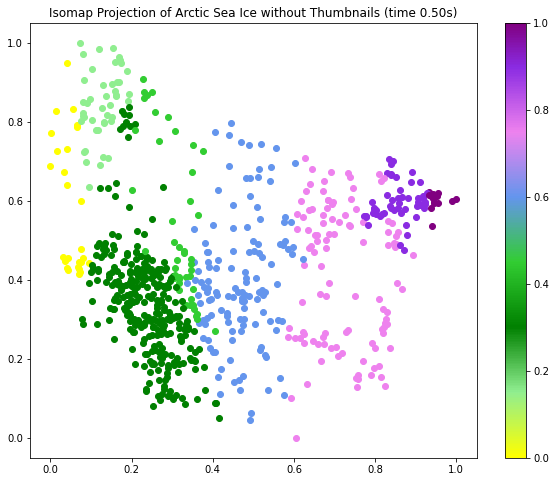

In [36]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
#print("Done.")
plot_embedding_nothumb_a(X_iso,
               "Isomap Projection of Arctic Sea Ice without Thumbnails (time %.2fs)" %
               (time() - t0))


Computing Isomap embedding


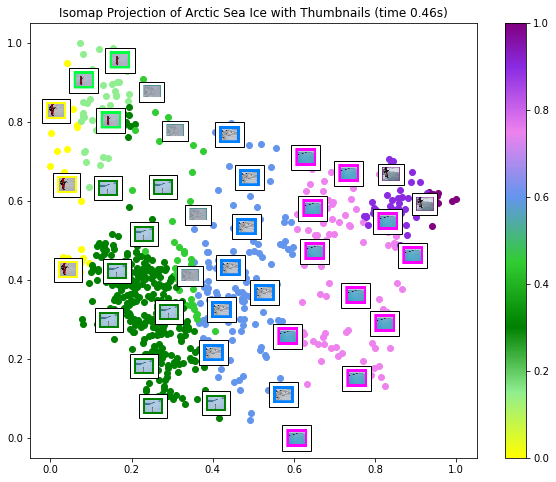

In [21]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
#print("Done.")
plot_embedding_yesthumb_a(X_iso,
               "Isomap Projection of Arctic Sea Ice with Thumbnails (time %.2fs)" %
               (time() - t0))


Computing Isomap embedding


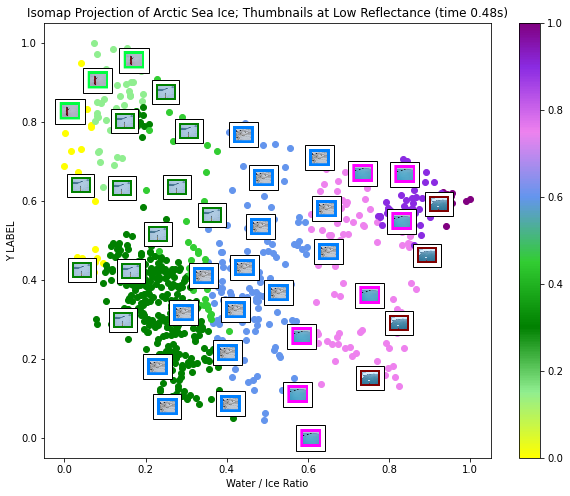

In [24]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
#print("Done.")
plot_embedding_yesthumb2a(X_iso,
               "Isomap Projection of Arctic Sea Ice; Thumbnails at Low Reflectance (time %.2fs)" %
               (time() - t0))


Computing Isomap embedding


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\291322029.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


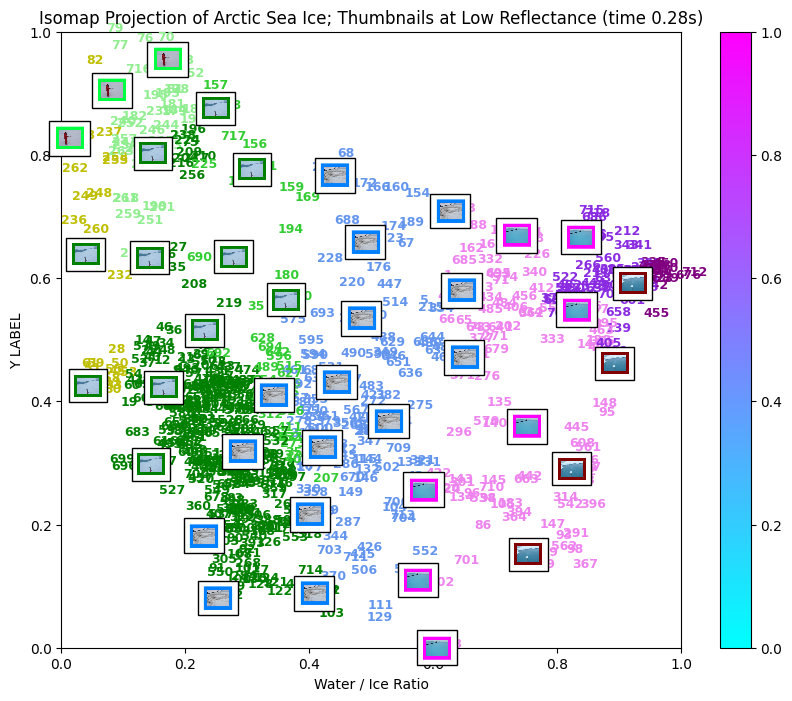

In [249]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
#print("Done.")
plot_embedding_yesthumb3(X_iso,
               "Isomap Projection of Arctic Sea Ice; Thumbnails at Low Reflectance (time %.2fs)" %
               (time() - t0))


Computing LLE embedding
Reconstruction error: 1.34362e-06


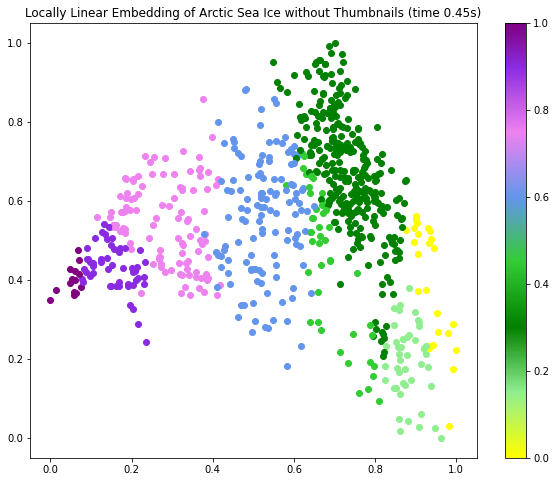

In [22]:
#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset

print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_nothumb_a(X_lle,
               "Locally Linear Embedding of Arctic Sea Ice without Thumbnails (time %.2fs)" %
               (time() - t0))


Computing LLE embedding
Reconstruction error: 1.34362e-06


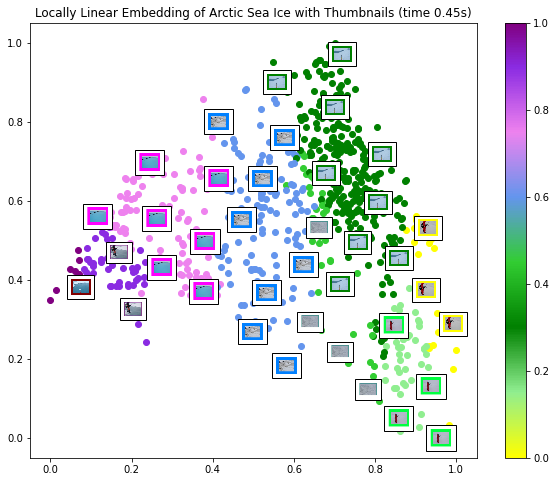

In [23]:
#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset

print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb_a(X_lle,
               "Locally Linear Embedding of Arctic Sea Ice with Thumbnails (time %.2fs)" %
               (time() - t0))


Computing LLE embedding
Reconstruction error: 1.34362e-06


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\291322029.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


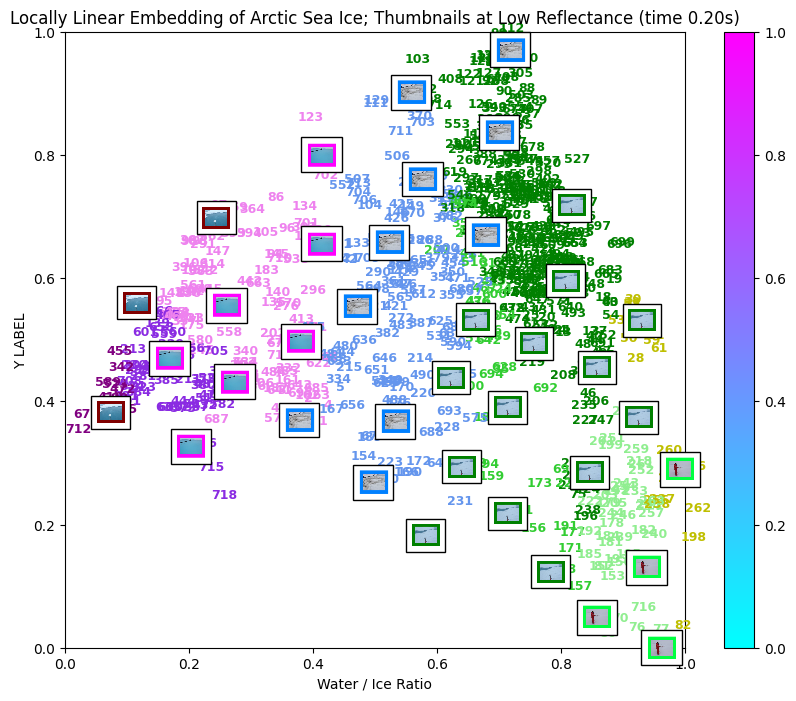

In [252]:
#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset

print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb3(X_lle,
               "Locally Linear Embedding of Arctic Sea Ice; Thumbnails at Low Reflectance (time %.2fs)" %
               (time() - t0))


In [24]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_nothumb_a(X_mlle,
               "Modified Locally Linear Embedding of Arctic Sea Ice (time %.2fs)" %
               (time() - t0))


Computing modified LLE embedding
Reconstruction error: 0.0940706


Computing modified LLE embedding
Reconstruction error: 0.0940693


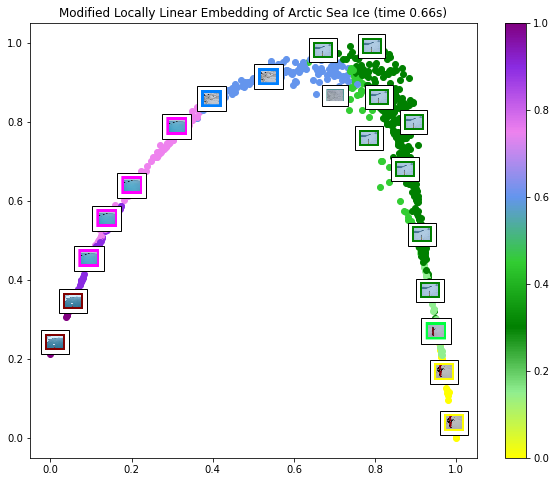

In [25]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb_a(X_mlle,
               "Modified Locally Linear Embedding of Arctic Sea Ice (time %.2fs)" %
               (time() - t0))


Computing modified LLE embedding
Reconstruction error: 0.0938712


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\291322029.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


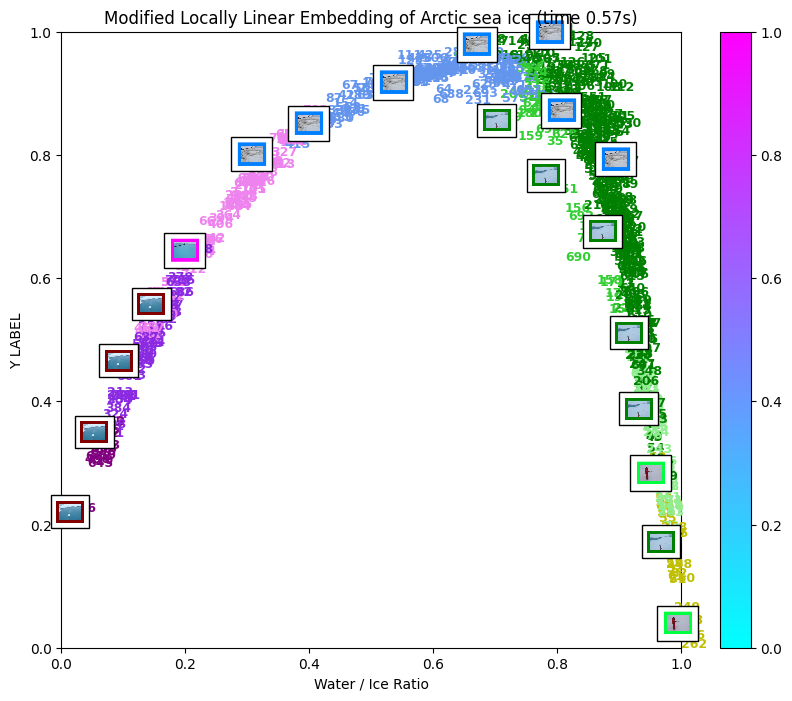

In [255]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb3(X_mlle,
               "Modified Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing Hessian LLE embedding
Reconstruction error: 0.0363774


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\2402323574.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


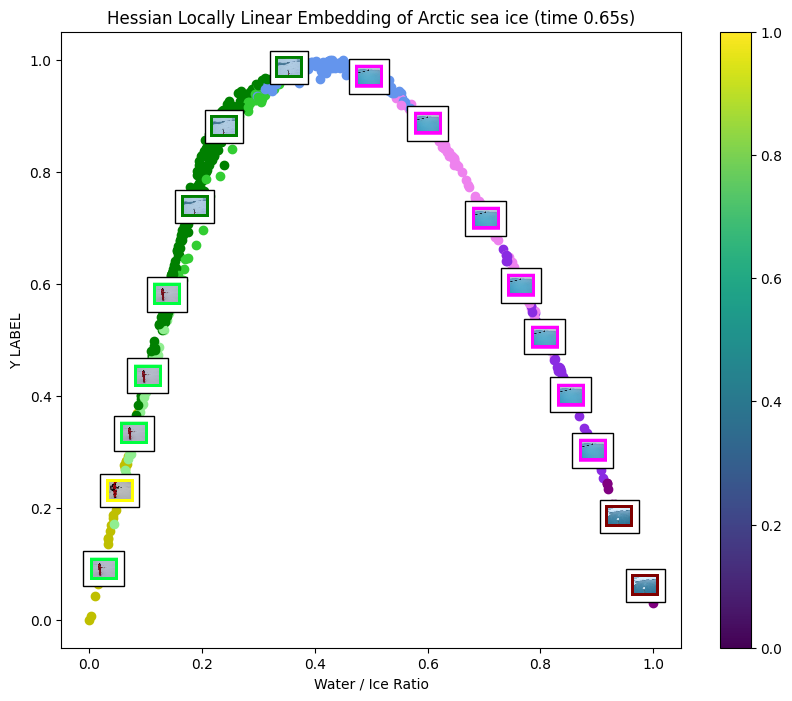

In [256]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing Hessian LLE embedding")
clfh = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clfh.fit_transform(X)
print("Reconstruction error: %g" % clfh.reconstruction_error_)
plot_embedding_yesthumb1(X_hlle,
               "Hessian Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing Hessian LLE embedding
Reconstruction error: 0.0364009


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\3475906607.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


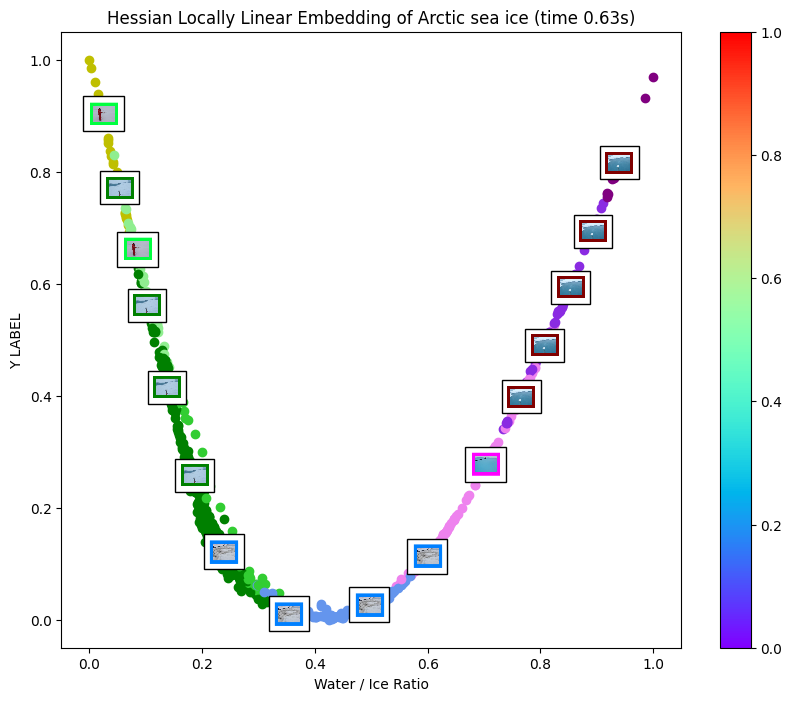

In [257]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing Hessian LLE embedding")
clfh = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clfh.fit_transform(X)
print("Reconstruction error: %g" % clfh.reconstruction_error_)
plot_embedding_yesthumb2(X_hlle,
               "Hessian Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing Hessian LLE embedding
Reconstruction error: 0.0364015


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\291322029.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


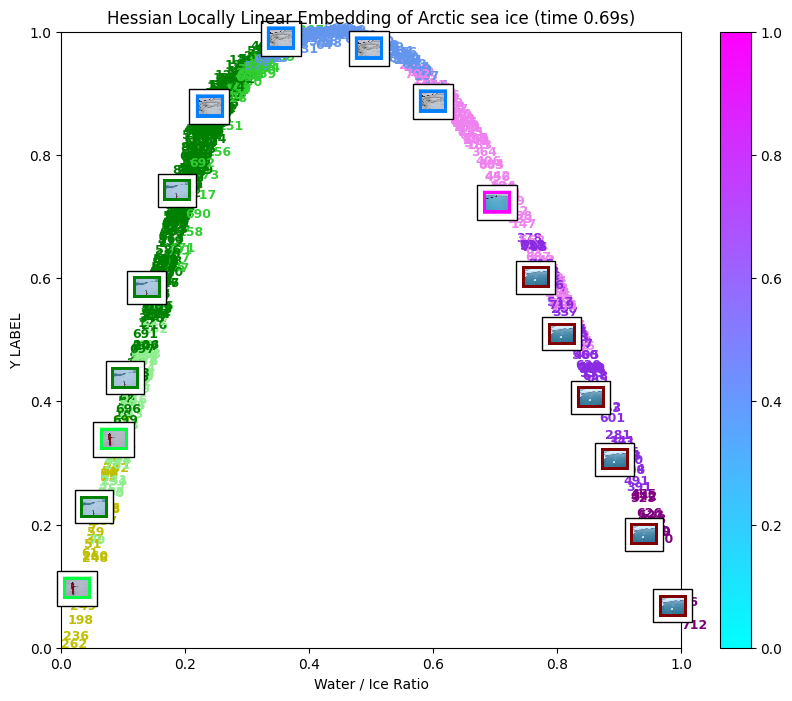

In [258]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing Hessian LLE embedding")
clfh = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clfh.fit_transform(X)
print("Reconstruction error: %g" % clfh.reconstruction_error_)
plot_embedding_yesthumb3(X_hlle,
               "Hessian Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing LTSA embedding
Reconstruction error: 0.0364018


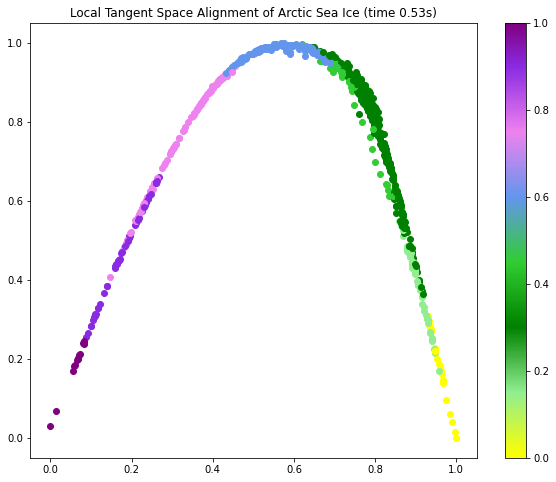

In [26]:
#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_nothumb_a(X_ltsa,
               "Local Tangent Space Alignment of Arctic Sea Ice (time %.2fs)" %
               (time() - t0))


Computing LTSA embedding
Reconstruction error: 0.0364017


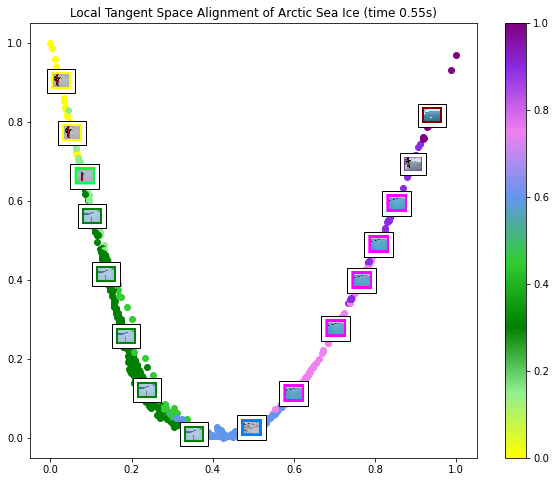

In [27]:
#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb_a(X_ltsa,
               "Local Tangent Space Alignment of Arctic Sea Ice (time %.2fs)" %
               (time() - t0))


Computing LTSA embedding
Reconstruction error: 0.0364017


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\291322029.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


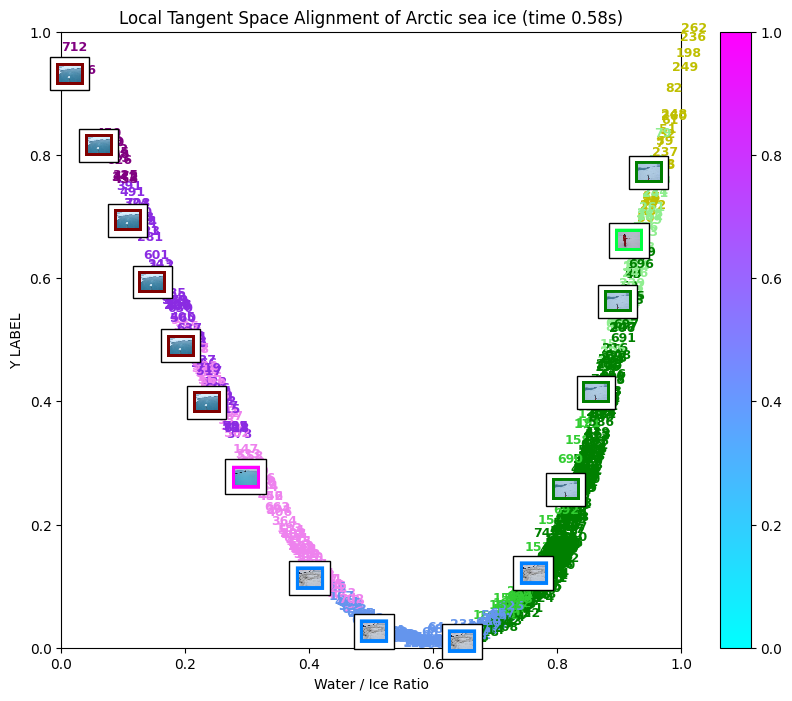

In [261]:
#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb3(X_ltsa,
               "Local Tangent Space Alignment of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing MDS embedding
Stress: 16688.486688


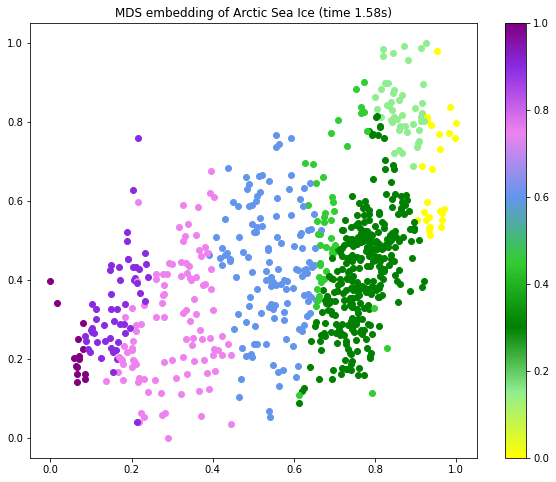

In [40]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
random_seed=42
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, random_state=random_seed)
t0 = time()
X_mds = clf.fit_transform(X)
print("Stress: %f" % clf.stress_)
plot_embedding_nothumb_a(X_mds,
               "MDS embedding of Arctic Sea Ice (time %.2fs)" %
               (time() - t0))


Computing MDS embedding
Stress: 30354.962054


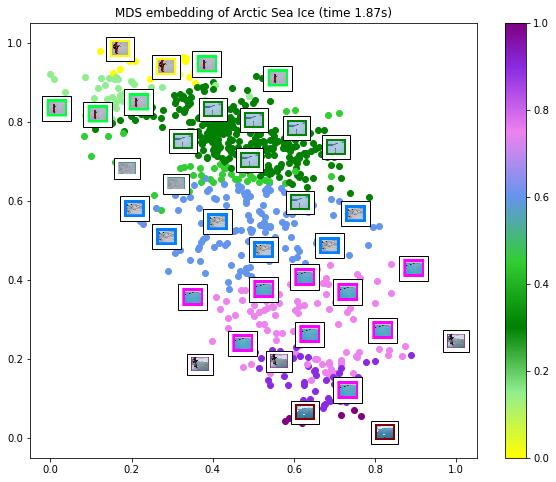

In [32]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Stress: %f" % clf.stress_)
plot_embedding_yesthumb_a(X_mds,
               "MDS embedding of Arctic Sea Ice (time %.2fs)" %
               (time() - t0))


Computing MDS embedding
Stress: 32288.500408


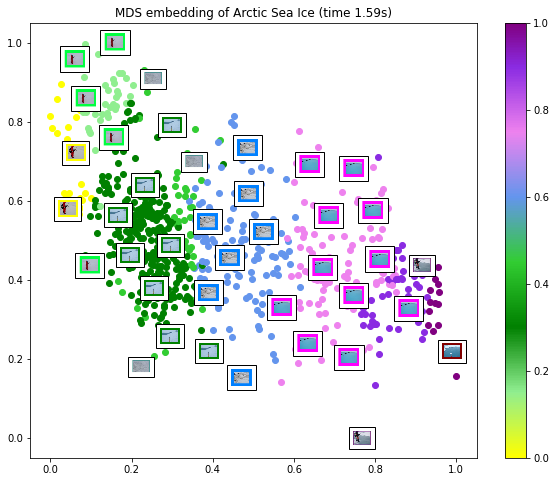

In [18]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Stress: %f" % clf.stress_)
plot_embedding_yesthumb_a(X_mds,
               "MDS embedding of Arctic Sea Ice (time %.2fs)" %
               (time() - t0))


Computing MDS embedding


c:\Users\wb8by\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Stress: 27261.881559


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\291322029.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


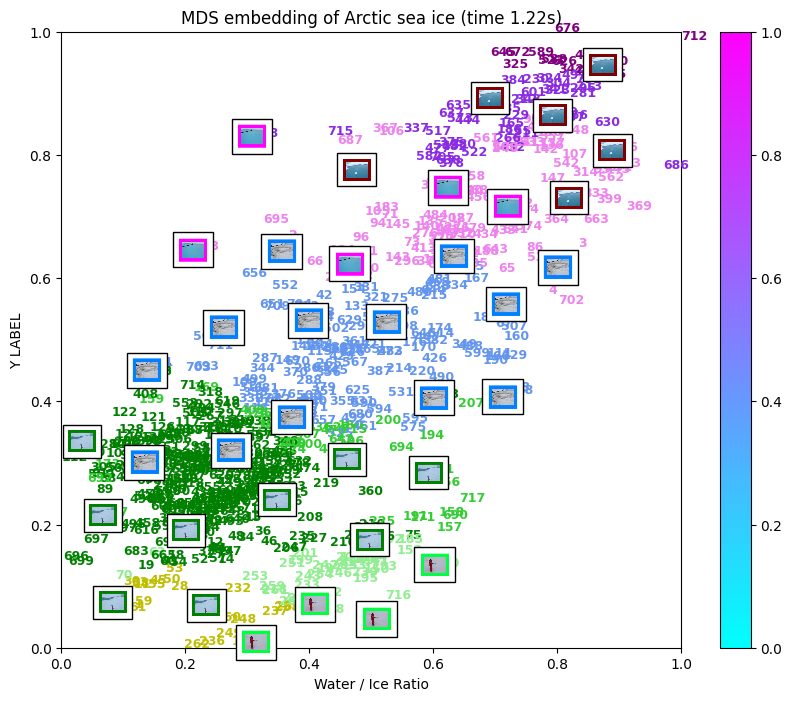

In [264]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Stress: %f" % clf.stress_)
plot_embedding_yesthumb3(X_mds,
               "MDS embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing t-SNE embedding


C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


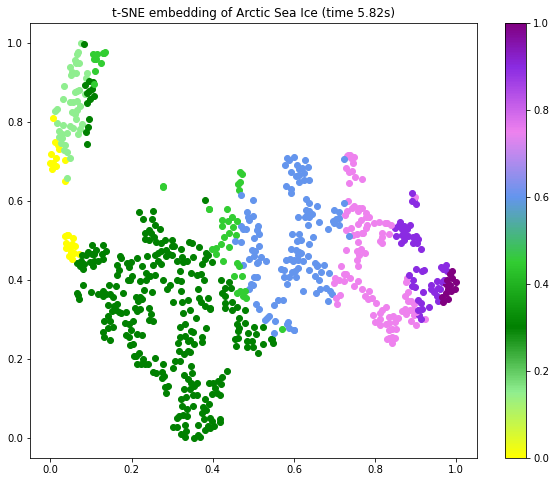

In [19]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding_nothumb_a(X_tsne,
               "t-SNE embedding of Arctic Sea Ice (time %.2fs)" %
               (time() - t0))

plt.show()


Computing t-SNE embedding


C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


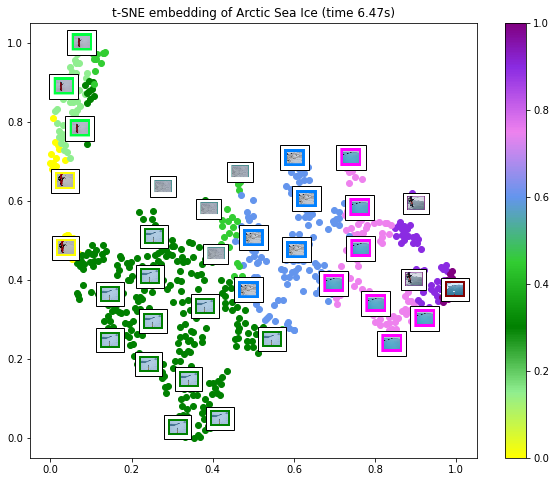

In [20]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding_yesthumb_a(X_tsne,
               "t-SNE embedding of Arctic Sea Ice (time %.2fs)" %
               (time() - t0))

plt.show()


Computing t-SNE embedding


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\291322029.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


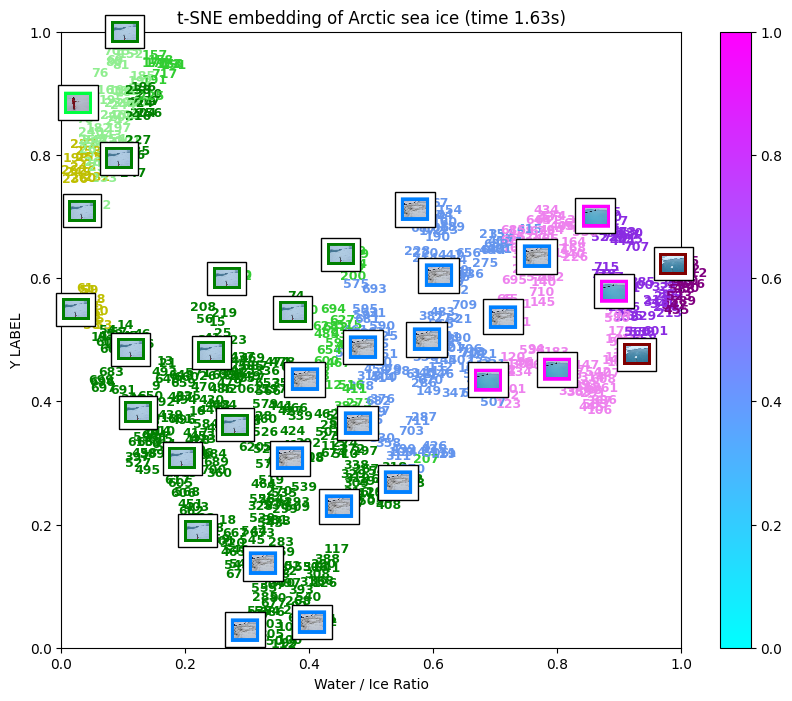

In [267]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding_yesthumb3(X_tsne,
               "t-SNE embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))

plt.show()


Computing Totally Random Trees embedding


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\2402323574.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


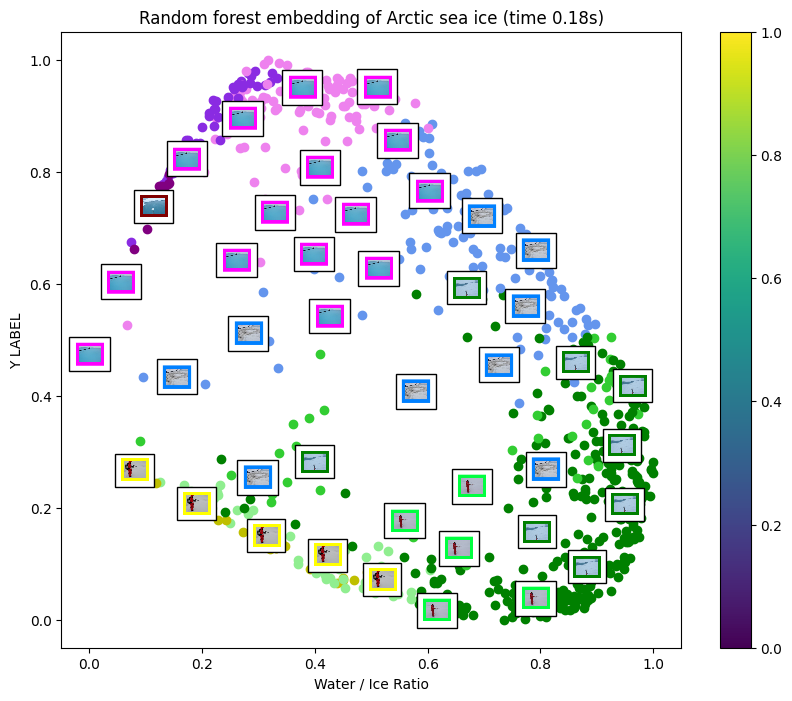

In [268]:
#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding_yesthumb1(X_reduced,
               "Random forest embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing Totally Random Trees embedding


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\3475906607.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


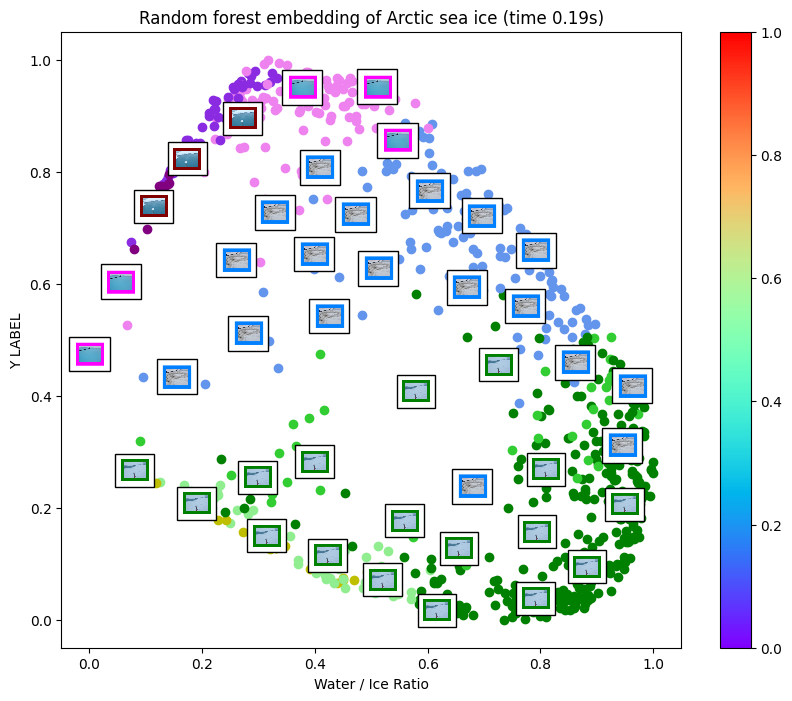

In [269]:
#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding_yesthumb2(X_reduced,
               "Random forest embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing Totally Random Trees embedding


C:\Users\wb8by\AppData\Local\Temp\ipykernel_23028\291322029.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


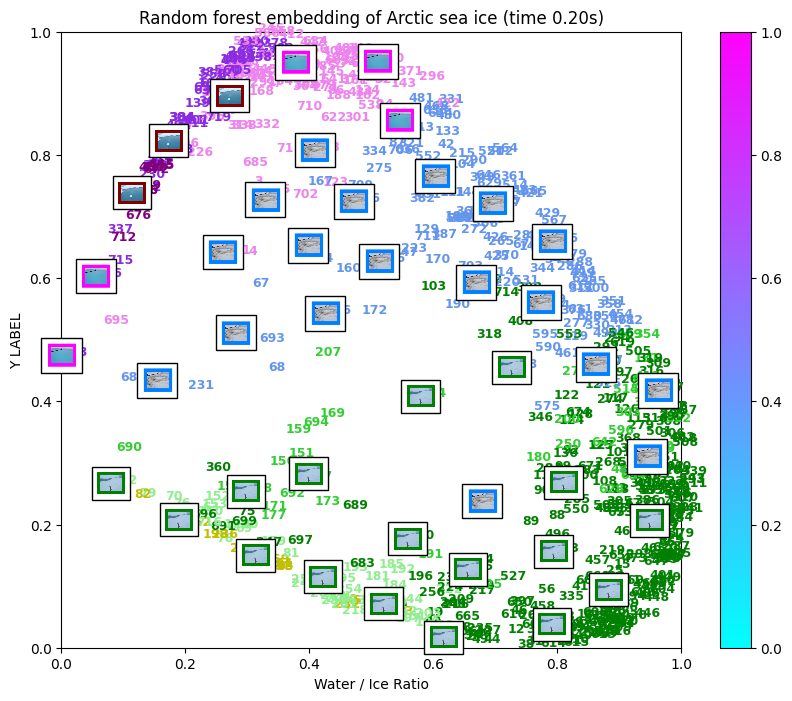

In [270]:
#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding_yesthumb3(X_reduced,
               "Random forest embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


In [271]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsClassifier

# Load a sample dataset (e.g., digits dataset)
data = load_digits()
X, y = data.data, data.target

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of neighbor values to test
neighbor_values = list(range(11, 101, 5))  # Adjust the range as needed

# Initialize empty lists to store cross-validation scores
cv_scores = []

# Iterate over different neighbor values and perform cross-validation
for n_neighbors in neighbor_values:
    # Create an Isomap instance with the current neighbor value
    isomap = Isomap(n_neighbors=n_neighbors)
    
    # Transform the training data using Isomap
    X_isomap = manifold.Isomap.fit_transform(X)
   # X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
    
    # Train a K-Nearest Neighbors classifier on the transformed data
    knn = KNeighborsClassifier()
    
    # Compute the cross-validation score for the current neighbor value
    scores = cross_val_score(knn, X_train_isomap, y_train, cv=5)  # You can adjust the number of folds (cv) as needed
    
    # Calculate the mean score and append it to the list of scores
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)

# Find the optimal number of neighbors that resulted in the highest cross-validation score
optimal_n_neighbors = neighbor_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors for Isomap is: {optimal_n_neighbors}")

# Now, you can use this optimal number of neighbors for Isomap for further analysis or visualization.


TypeError: Isomap.fit_transform() missing 1 required positional argument: 'X'

# Bill's 10_24 Analysis

In [ ]:
data.shape

(720, 1404)

In [ ]:
print(len(wl3))

1404


[ 100  400  600  700  750 1284]
[ 450  750  950 1050 1100 1634]
82
79
587
628
595
367
384
450


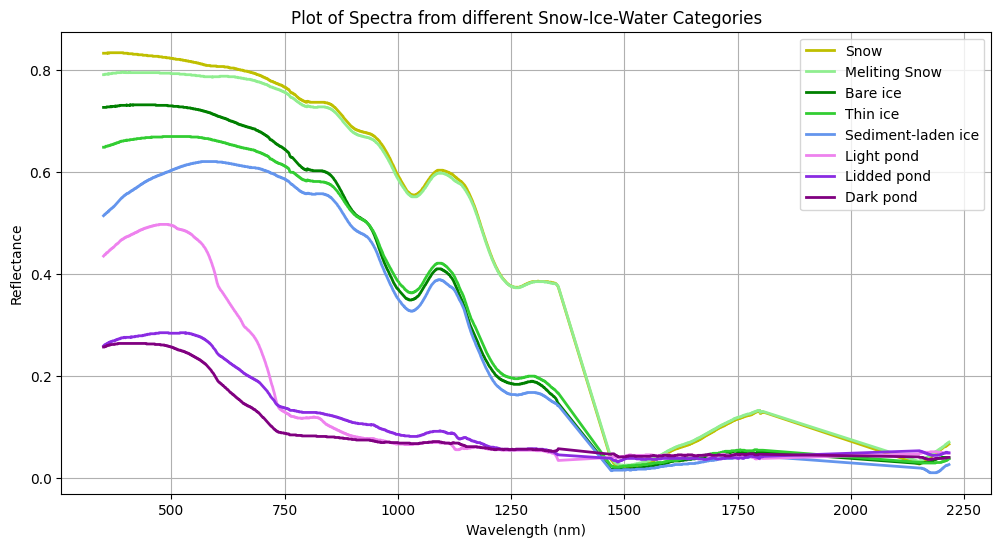

In [ ]:
bands = []
bands.append(np.argmin(np.abs(wl3-450)))
bands.append(np.argmin(np.abs(wl3-750)))
bands.append(np.argmin(np.abs(wl3-950)))
bands.append(np.argmin(np.abs(wl3-1050)))
bands.append(np.argmin(np.abs(wl3-1100)))
bands.append(np.argmin(np.abs(wl3-1750)))
bands = np.asarray(bands).astype(int)
bands_wl = []
for x in bands:
    bands_wl.append(wl3[x])
bands_wl = np.asarray(bands_wl).astype(int)
print(bands)
print(bands_wl)


snow_vals = np.asarray([0.85,0.85,0.75,0.7,0.7,0.2])
# choose a snow spectrum:
idx_snow = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-snow_vals)**2)
    if dist < min_dist:
        idx_snow = i
        min_dist = dist
spec_snow = data[idx_snow,:]
print(idx_snow)

melting_snow_vals = np.asarray([0.8,0.75,0.62,0.61,0.6,0.17])
# choose a snow spectrum:
idx_melting_snow = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-melting_snow_vals)**2)
    if dist < min_dist:
        idx_melting_snow = i
        min_dist = dist
spec_melting_snow = data[idx_melting_snow,:]
print(idx_melting_snow)

bare_ice_vals = np.asarray([0.75,0.65,0.42,0.37,0.41,0.04])
# choose a snow spectrum:
idx_bare_ice = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-bare_ice_vals)**2)
    if dist < min_dist:
        idx_bare_ice = i
        min_dist = dist
spec_bare_ice = data[idx_bare_ice,:]
print(idx_bare_ice)

#450  750  950 1050 1100 1634
thin_ice_vals = np.asarray([0.65,0.61,0.42,0.39,0.43,0.04])
# choose a snow spectrum:
idx_thin_ice = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-thin_ice_vals)**2)
    if dist < min_dist:
        idx_thin_ice = i
        min_dist = dist
spec_thin_ice = data[idx_thin_ice,:]
print(idx_thin_ice)

#450  750  950 1050 1100 1634
sediment_ice_vals = np.asarray([0.54,0.61,0.4,0.36,0.38,0.04])
# choose a snow spectrum:
idx_sediment_ice = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-sediment_ice_vals)**2)
    if dist < min_dist:
        idx_sediment_ice = i
        min_dist = dist
spec_sediment_ice = data[idx_sediment_ice,:]
print(idx_sediment_ice)

#450  750  950 1050 1100 1634
light_pond_vals = np.asarray([0.55,0.1,0.08,0.07,0.06,0.05])
# choose a snow spectrum:
idx_light_pond = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-light_pond_vals)**2)
    if dist < min_dist:
        idx_light_pond = i
        min_dist = dist
spec_light_pond = data[idx_light_pond,:]
print(idx_light_pond)

#450  750  950 1050 1100 1634
lidded_pond_vals = np.asarray([0.25,0.18,0.12,0.12,0.06,0.05])
# choose a snow spectrum:
idx_lidded_pond = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-lidded_pond_vals)**2)
    if dist < min_dist:
        idx_lidded_pond = i
        min_dist = dist
spec_lidded_pond = data[idx_lidded_pond,:]
print(idx_lidded_pond)

#450  750  950 1050 1100 1634
dark_pond_vals = np.asarray([0.25,0.1,0.08,0.07,0.06,0.05])
# choose a snow spectrum:
idx_dark_pond = 0
min_dist = 10000
for i in range(data.shape[0]):
    dist = np.sum((data[i,bands]-dark_pond_vals)**2)
    if dist < min_dist:
        idx_dark_pond = i
        min_dist = dist
spec_dark_pond = data[idx_dark_pond,:]
print(idx_dark_pond)

plt.figure()
plt.plot(wl3, spec_snow, color='y', linewidth=2, label='Snow')
plt.plot(wl3, spec_melting_snow, color='lightgreen', linewidth=2, label='Meliting Snow')
plt.plot(wl3, spec_bare_ice, color='g', linewidth=2, label='Bare ice')
plt.plot(wl3, spec_thin_ice, color='limegreen', linewidth=2, label='Thin ice')
plt.plot(wl3, spec_sediment_ice, color='cornflowerblue', linewidth=2, label='Sediment-laden ice')
plt.plot(wl3, spec_light_pond, color='violet', linewidth=2, label='Light pond')
plt.plot(wl3, spec_lidded_pond, color='blueviolet', linewidth=2, label='Lidded pond')
plt.plot(wl3, spec_dark_pond, color='purple', linewidth=2, label='Dark pond')
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Plot of Spectra from different Snow-Ice-Water Categories')
plt.legend(); 

#Perform classificaiton based on these spectra
cls = np.zeros(data.shape[0]).astype(int)
for i in range(data.shape[0]):
    distances = np.asarray([math.dist(data[i,:],spec_snow),
        math.dist(data[i,:],spec_melting_snow),
        math.dist(data[i,:],spec_bare_ice),
        math.dist(data[i,:],spec_thin_ice),
        math.dist(data[i,:],spec_sediment_ice),
        math.dist(data[i,:],spec_light_pond),
        math.dist(data[i,:],spec_lidded_pond),
        math.dist(data[i,:],spec_dark_pond)        
    ])
    cls[i] = np.argmin(distances)

In [ ]:
# Dimension Reduction with PCA
pca = PCA(whiten=True, n_components=10)
pca.fit(data)
pca_spec = pca.transform(data).T
print('num PCs: '+str(pca_spec.shape[0]))
print('num Spectra: '+str(pca_spec.shape[1]))

num PCs: 10
num Spectra: 720


[9.30858710e-01 4.83086847e-02 1.53128928e-02 3.20787566e-03
 1.09853854e-03 6.05766942e-04 2.30971668e-04 1.15641437e-04
 8.43912139e-05 5.13199026e-05]


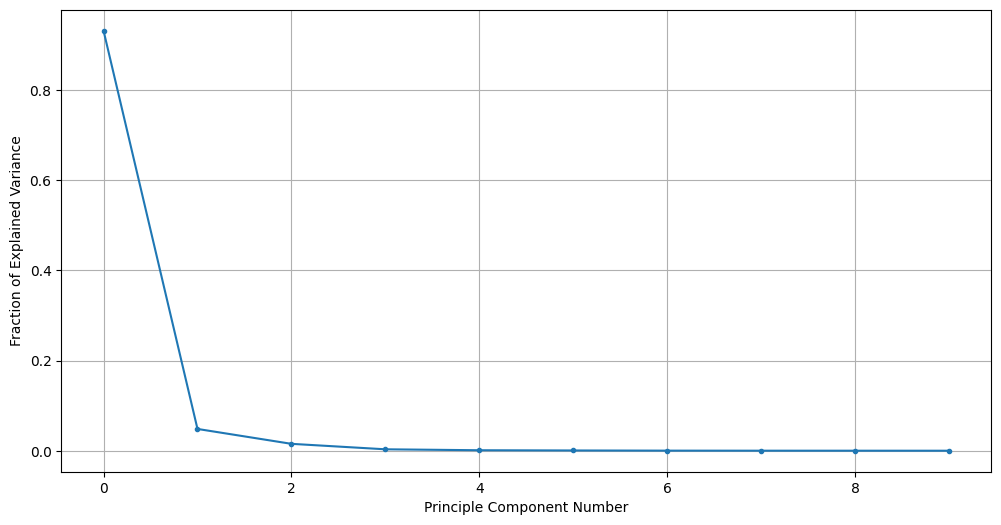

In [ ]:
plt.plot(pca.explained_variance_ratio_, marker='.')
plt.xlabel('Principle Component Number')
plt.ylabel('Fraction of Explained Variance')
plt.grid(True)
print(pca.explained_variance_ratio_)

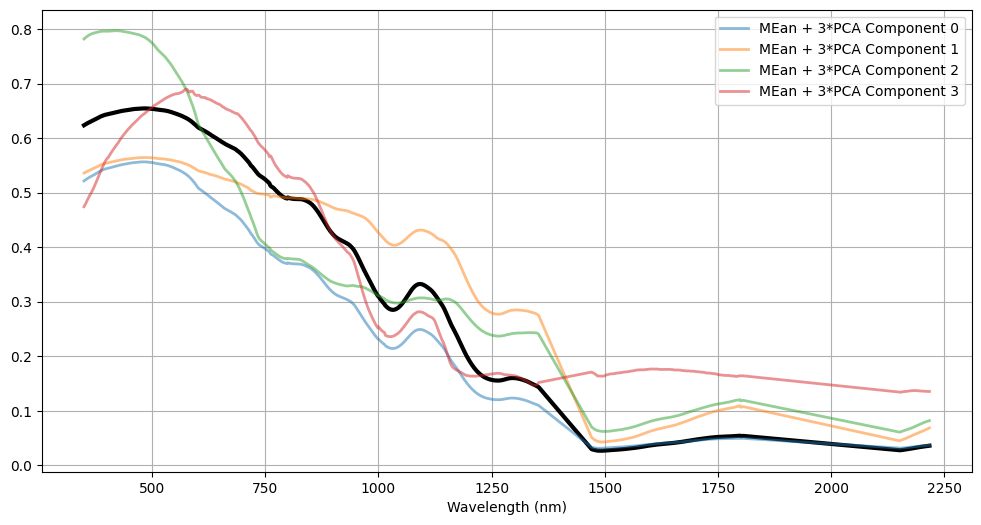

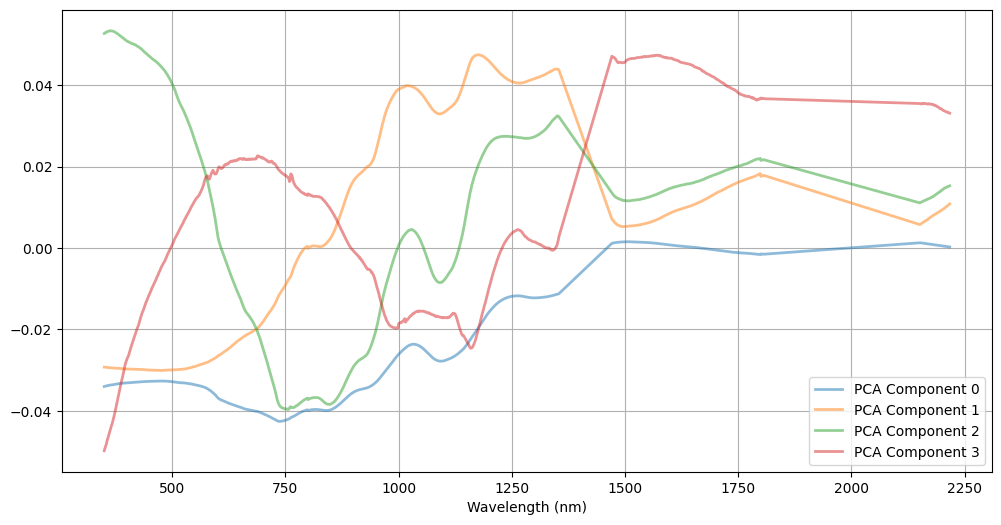

In [ ]:
# Visually examining the first few PCs (from the eigenvectors)
plt.figure()
plt.plot(wl3, pca.mean_, 'k', linewidth=3)
for i in range(4):
    #note: I am multiplying by 3 to see the variation in the PCS better 
    plt.plot(wl3, pca.mean_ + 3*pca.components_[i,:], linewidth=2, label='MEan + 3*PCA Component '+str(i), alpha=0.5)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.legend(); 

plt.figure()
for i in range(4):
    plt.plot(wl3, pca.components_[i,:], linewidth=2, label='PCA Component '+str(i), alpha=0.5)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.legend();

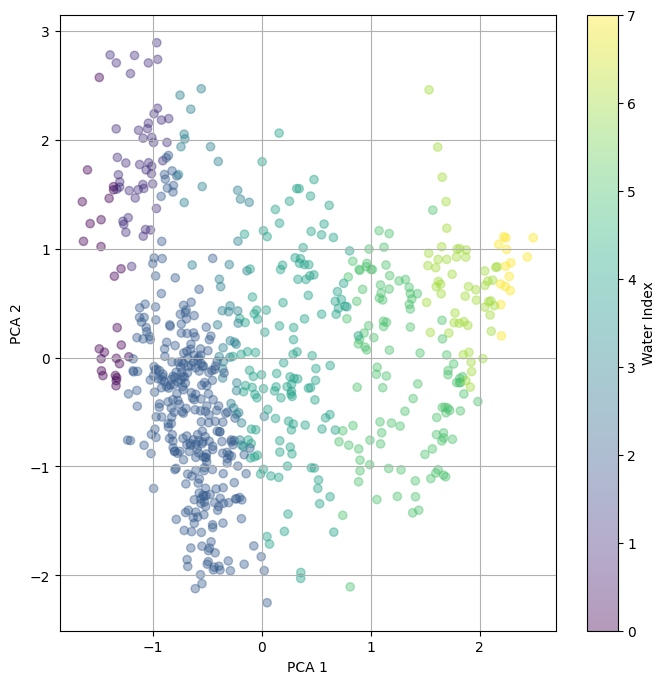

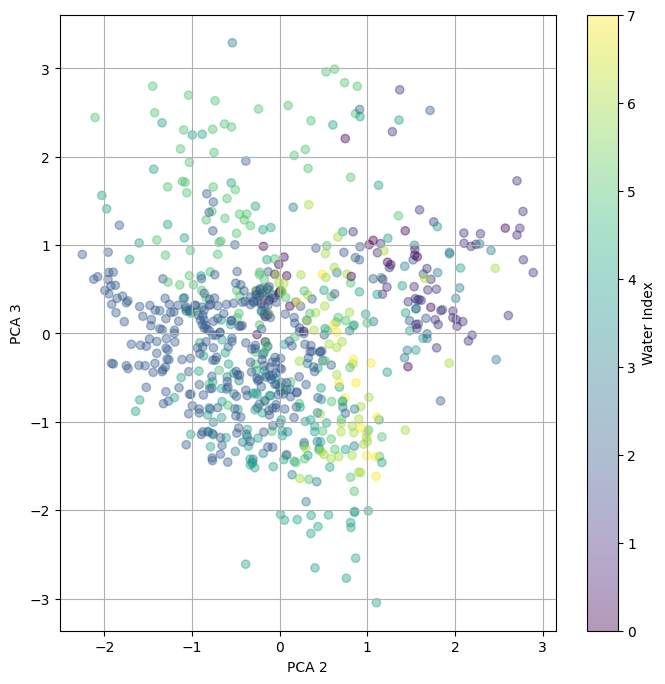

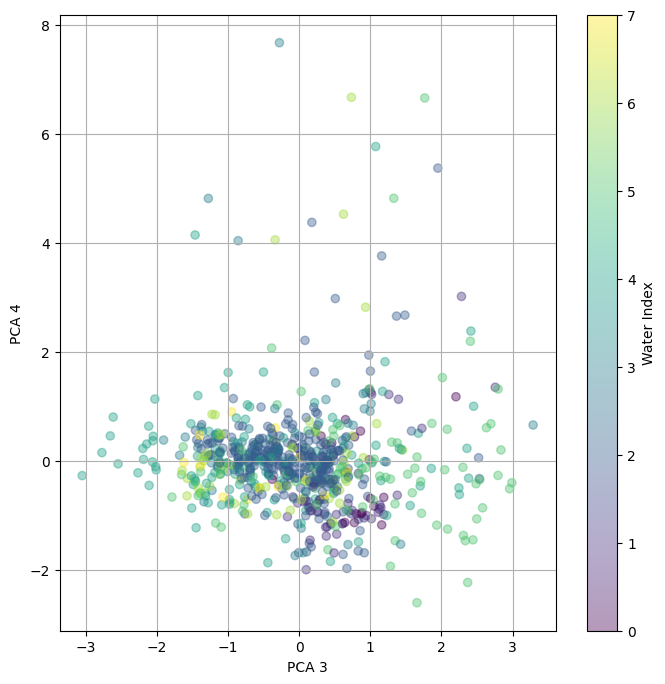

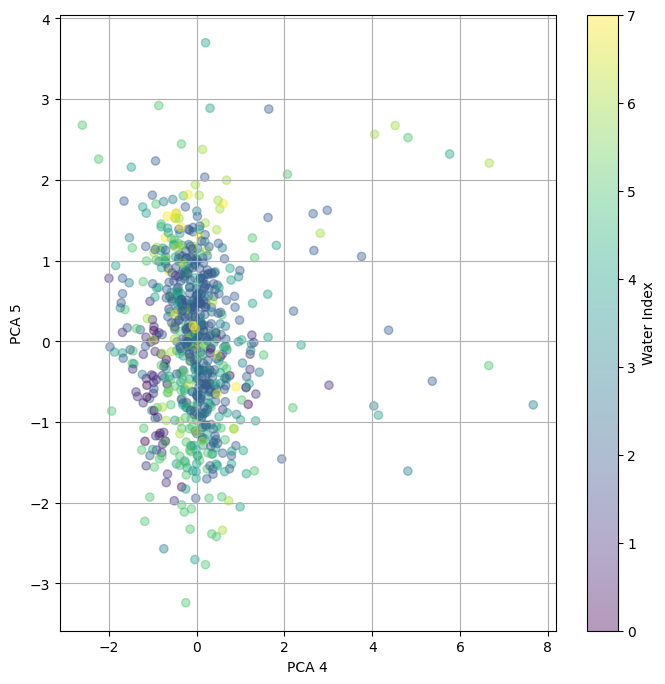

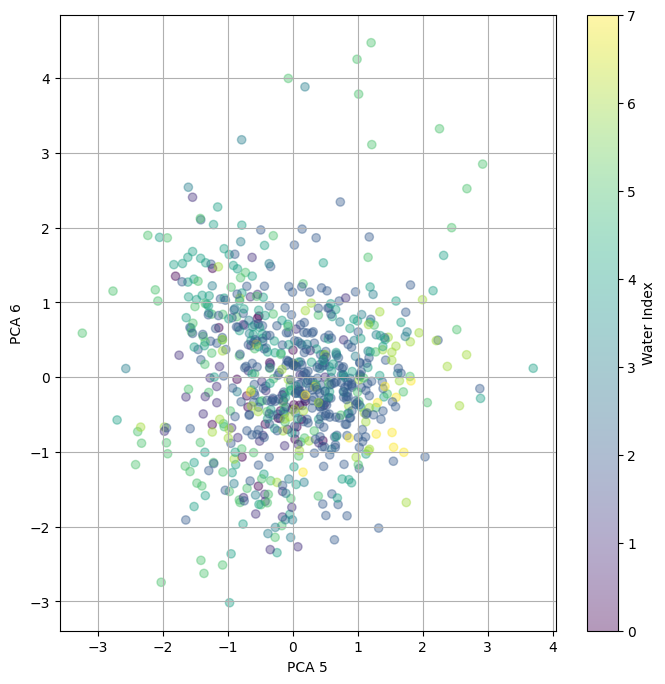

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.figure()
plt.scatter(pca_spec[0,:],pca_spec[1,:], c=cls, alpha=0.4)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
cbar = plt.colorbar()
cbar.set_label('Water Index')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[1,:],pca_spec[2,:], c=cls, alpha=0.4)
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
cbar = plt.colorbar()
cbar.set_label('Water Index')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[2,:],pca_spec[3,:], c=cls, alpha=0.4)
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')
cbar = plt.colorbar()
cbar.set_label('Water Index')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[3,:],pca_spec[4,:], c=cls, alpha=0.4)
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
cbar = plt.colorbar()
cbar.set_label('Water Index')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[4,:],pca_spec[5,:], c=cls, alpha=0.4)
plt.xlabel('PCA 5')
plt.ylabel('PCA 6')
cbar = plt.colorbar()
cbar.set_label('Water Index')
plt.grid(True)
plt.rcParams["figure.figsize"] = (12,6)